In [1]:
#Download SNP500 data from 1973 to 2023
#use Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta


In [2]:
pred_preiod = 10
dist = 0

In [3]:
import yfinance as yf

# Download data for the S&P 500 index from 2020 to 2022
ticker = "NDX" #"SPY"
start_date = "1973-01-01"
end_date = "2023-05-25"
sp500_data = yf.download(ticker, start=start_date, end=end_date)

# Print the first 5 rows of the data
print(sp500_data.head())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
1985-10-01  110.620003  112.160004  110.565002  112.139999  112.139999  \
1985-10-02  112.139999  112.540001  110.779999  110.824997  110.824997   
1985-10-03  110.839996  111.184998  110.120003  110.870003  110.870003   
1985-10-04  110.870003  110.870003  109.855003  110.074997  110.074997   
1985-10-07  110.074997  110.135002  108.175003  108.199997  108.199997   

               Volume  
Date                   
1985-10-01  153160000  
1985-10-02  164640000  
1985-10-03  147300000  
1985-10-04  147900000  
1985-10-07  128640000  


<Axes: xlabel='Date'>

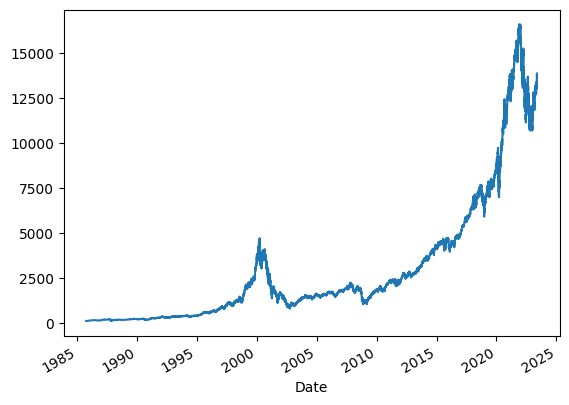

In [4]:
# Plot the adjusted close price
sp500_data["Adj Close"].plot()

In [5]:
#get percent growth from start to end
start_price = sp500_data["Adj Close"][0]
end_price = sp500_data["Adj Close"][-1]
percent_growth = (end_price-start_price)/start_price
print(percent_growth)

120.31693011232369


In [6]:
dataset = pd.DataFrame(sp500_data["Adj Close"])

In [7]:
#get the most important technical indicators
ma_50 = sp500_data["Adj Close"].rolling(window=50).mean()
ma_200 = sp500_data["Adj Close"].rolling(window=200).mean()
ema_5 = sp500_data["Adj Close"].ewm(span=5, adjust=False).mean()
ema_10 = sp500_data["Adj Close"].ewm(span=10, adjust=False).mean()
ema_25 = sp500_data["Adj Close"].ewm(span=25, adjust=False).mean()
ema_50 = sp500_data["Adj Close"].ewm(span=50, adjust=False).mean()
ema_200 = sp500_data["Adj Close"].ewm(span=200, adjust=False).mean()

#get the RSI (relative strength index)
#RSI = 100 - 100/(1 + RS)
rsi = ta.momentum.RSIIndicator(sp500_data["Adj Close"], window=14).rsi()

# Download VIX data from Yahoo Finance
vix = yf.download('^VIX', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [8]:
rsi

Date
1985-10-01          NaN
1985-10-02          NaN
1985-10-03          NaN
1985-10-04          NaN
1985-10-07          NaN
                ...    
2023-05-18    72.422580
2023-05-19    70.854829
2023-05-22    71.830495
2023-05-23    63.113017
2023-05-24    60.096268
Name: rsi, Length: 9489, dtype: float64

In [9]:
dataset['ma_50'] = ma_50
dataset['ma_200'] = ma_200
dataset['ema_5'] = ema_5
dataset['ema_10'] = ema_10
dataset['ema_25'] = ema_25
dataset['ema_50'] = ema_50
dataset['ema_200'] = ema_200
dataset['rsi'] = rsi

<Axes: xlabel='Date'>

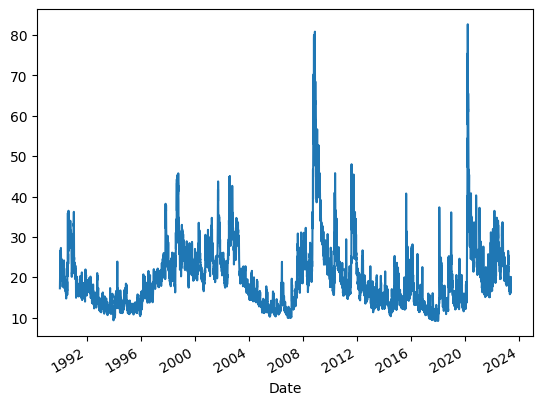

In [10]:
#plot vix
vix["Adj Close"].plot()

In [11]:
#GDP growth, inflation rates, and employment data
import pandas_datareader.data as web


In [12]:
start_date = "1973-01-01"

In [13]:
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date) #Lags behind 6 months
inflation = web.DataReader('CPIAUCSL', 'fred', start_date, end_date) #Lags behind 2 months
unemployment = web.DataReader('UNRATE', 'fred', start_date, end_date) #lags behind 3 months

In [14]:
unemployment

,UNRATE
DATE,
1973-01-01,4.9
1973-02-01,5.0
1973-03-01,4.9
1973-04-01,5.0
1973-05-01,4.9
...,...
2023-01-01,3.4
2023-02-01,3.6
2023-03-01,3.5


In [15]:
#convert inflation to inflatin rate
inflation_rate = inflation.pct_change()
#add smoothed inflation rate
inflation_rate['inflation_rate_12m'] = inflation_rate['CPIAUCSL'].rolling(window=12).mean()

In [16]:
dataset['daily_returns'] = sp500_data["Adj Close"].pct_change().shift(-1)

<Axes: xlabel='DATE'>

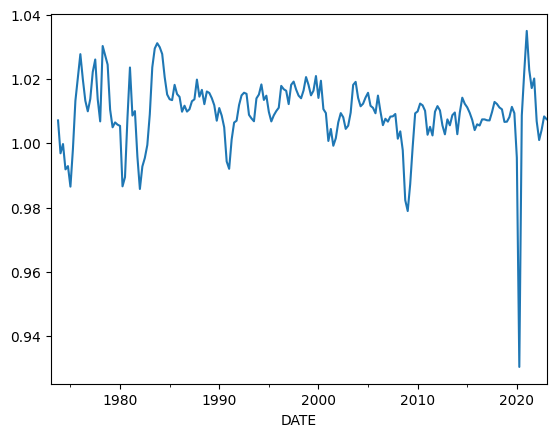

In [17]:
#calculate moving average of GDP
gdp['gdp_1m'] = gdp['GDPC1'].rolling(window=1).mean()
gdp['gdp_4m'] = gdp['GDPC1'].rolling(window=4).mean()
gdp['gdp_12m'] = gdp['GDPC1'].rolling(window=12).mean()
gdp['gdp_ratio_1m'] = (gdp['gdp_1m']/gdp['gdp_12m'])
gdp['gdp_ratio_1m_short'] = (gdp['gdp_1m']/gdp['gdp_4m'])
gdp['gdp_ratio_4m'] = (gdp['gdp_4m']/gdp['gdp_12m'])
gdp['gdp_pct_change'] = gdp['GDPC1'].pct_change()
#plot gdp
gdp['gdp_ratio_1m_short'].plot()

In [18]:
unemployment['unemployment_1m'] = unemployment['UNRATE'].rolling(window=1).mean()
unemployment['unemployment_4m'] = unemployment['UNRATE'].rolling(window=4).mean()
unemployment['unemployment_12m'] = unemployment['UNRATE'].rolling(window=12).mean()
unemployment['unemployment_ratio_1m'] = (unemployment['unemployment_1m']/unemployment['unemployment_12m'])
unemployment['unemployment_ratio_1m_short'] = (unemployment['unemployment_1m']/unemployment['unemployment_4m'])
unemployment['unemployment_ratio_4m'] = (unemployment['unemployment_4m']/unemployment['unemployment_12m'])
unemployment['unemployment_pct_change'] = unemployment['UNRATE'].pct_change()

In [19]:
inflation_rate['inflation_rate_1m'] = inflation_rate['CPIAUCSL'].rolling(window=1).mean()
inflation_rate['inflation_rate_4m'] = inflation_rate['CPIAUCSL'].rolling(window=4).mean()
inflation_rate['inflation_rate_12m'] = inflation_rate['CPIAUCSL'].rolling(window=12).mean()
inflation_rate['inflation_rate_ratio_1m'] = (inflation_rate['inflation_rate_1m']/inflation_rate['inflation_rate_12m'])
inflation_rate['inflation_rate_ratio_1m_short'] = (inflation_rate['inflation_rate_1m']/inflation_rate['inflation_rate_4m'])
inflation_rate['inflation_rate_ratio_4m'] = (inflation_rate['inflation_rate_4m']/inflation_rate['inflation_rate_12m'])
inflation_rate['inflation_rate_pct_change'] = inflation_rate['CPIAUCSL'].pct_change()

In [20]:
dataset['gdp_ratio_1m'] = gdp['gdp_ratio_1m']
dataset['gdp_ratio_1m_short'] = gdp['gdp_ratio_1m_short']
dataset['gdp_ratio_4m'] = gdp['gdp_ratio_4m']
dataset['gdp_pct_change'] = gdp['gdp_pct_change']

dataset['unemployment'] = unemployment['UNRATE']
dataset['unemployment_ratio_1m'] = unemployment['unemployment_ratio_1m']
dataset['unemployment_ratio_1m_short'] = unemployment['unemployment_ratio_1m_short']
dataset['unemployment_ratio_4m'] = unemployment['unemployment_ratio_4m']
dataset['unemployment_pct_change'] = unemployment['unemployment_pct_change']

dataset['inflation_rate'] = inflation_rate['inflation_rate_12m']
dataset['inflation_rate_ratio_1m'] = inflation_rate['inflation_rate_ratio_1m']
dataset['inflation_rate_ratio_1m_short'] = inflation_rate['inflation_rate_ratio_1m_short']
dataset['inflation_rate_ratio_4m'] = inflation_rate['inflation_rate_ratio_4m']
dataset['inflation_rate_pct_change'] = inflation_rate['inflation_rate_pct_change']


The Put call ratio should be a good indicator, yet it is recent, and may not be available into the 1970s

<Axes: xlabel='DATE'>

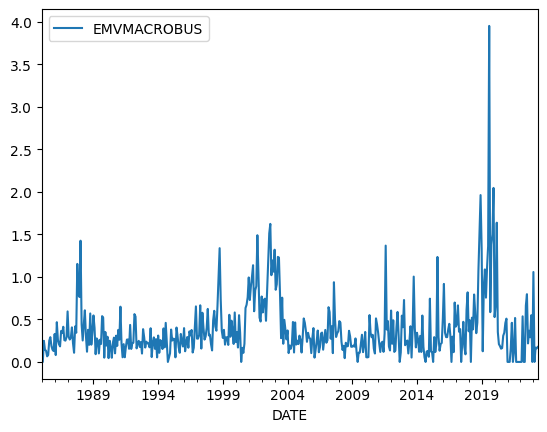

In [21]:
#investor Intelligence Sentiment Index
consumer_sentimet = web.DataReader('UMCSENT', 'fred', start_date, end_date) # Lags behind 
equity_volatility = web.DataReader('EMVMACROBUS', 'fred', start_date, end_date)
#plot iis
equity_volatility.plot()

In [22]:
consumer_sentimet['sent_1m'] = consumer_sentimet['UMCSENT'].rolling(window=1).mean()
consumer_sentimet['sent_4m'] = consumer_sentimet['UMCSENT'].rolling(window=4).mean()
consumer_sentimet['sent_12m'] = consumer_sentimet['UMCSENT'].rolling(window=12).mean()
consumer_sentimet['sent_ratio_1m'] = (consumer_sentimet['sent_1m']/consumer_sentimet['sent_12m'])
consumer_sentimet['sent_ratio_1m_short'] = (consumer_sentimet['sent_1m']/consumer_sentimet['sent_4m'])
consumer_sentimet['sent_ratio_4m'] = (consumer_sentimet['sent_4m']/consumer_sentimet['sent_12m'])
consumer_sentimet['sent_pct_change'] = consumer_sentimet['UMCSENT'].pct_change()

equity_volatility['vol_1m'] = equity_volatility['EMVMACROBUS'].rolling(window=1).mean()
equity_volatility['vol_4m'] = equity_volatility['EMVMACROBUS'].rolling(window=4).mean()
equity_volatility['vol_12m'] = equity_volatility['EMVMACROBUS'].rolling(window=12).mean()
equity_volatility['vol_ratio_1m'] = (equity_volatility['vol_1m']/equity_volatility['vol_12m'])
equity_volatility['vol_ratio_1m_short'] = (equity_volatility['vol_1m']/equity_volatility['vol_4m'])
equity_volatility['vol_ratio_4m'] = (equity_volatility['vol_4m']/equity_volatility['vol_12m'])
equity_volatility['vol_pct_change'] = (equity_volatility['EMVMACROBUS']+1).pct_change()

In [23]:
dataset['consumer_sentimet'] = consumer_sentimet['UMCSENT'] #lags behind 3 mo
dataset['sent_ratio_1m'] = consumer_sentimet['sent_ratio_1m']
dataset['sent_ratio_1m_short'] = consumer_sentimet['sent_ratio_1m_short']
dataset['sent_ratio_4m'] = consumer_sentimet['sent_ratio_4m']
dataset['sent_pct_change'] = consumer_sentimet['sent_pct_change']

dataset['equity_volatility'] = equity_volatility['EMVMACROBUS'] #lags behind 2 mo
dataset['vol_ratio_1m'] = equity_volatility['vol_ratio_1m']
dataset['vol_ratio_1m_short'] = equity_volatility['vol_ratio_1m_short']
dataset['vol_ratio_4m'] = equity_volatility['vol_ratio_4m']
dataset['vol_pct_change'] = equity_volatility['vol_pct_change']

In [24]:
dataset.columns

Index(['Adj Close', 'ma_50', 'ma_200', 'ema_5', 'ema_10', 'ema_25', 'ema_50',
       'ema_200', 'rsi', 'daily_returns', 'gdp_ratio_1m', 'gdp_ratio_1m_short',
       'gdp_ratio_4m', 'gdp_pct_change', 'unemployment',
       'unemployment_ratio_1m', 'unemployment_ratio_1m_short',
       'unemployment_ratio_4m', 'unemployment_pct_change', 'inflation_rate',
       'inflation_rate_ratio_1m', 'inflation_rate_ratio_1m_short',
       'inflation_rate_ratio_4m', 'inflation_rate_pct_change',
       'consumer_sentimet', 'sent_ratio_1m', 'sent_ratio_1m_short',
       'sent_ratio_4m', 'sent_pct_change', 'equity_volatility', 'vol_ratio_1m',
       'vol_ratio_1m_short', 'vol_ratio_4m', 'vol_pct_change'],
      dtype='object')

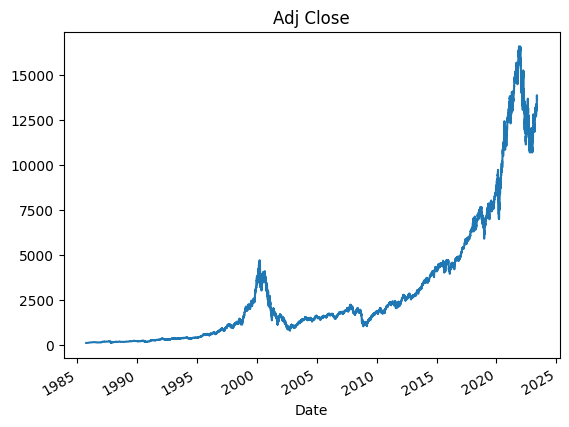

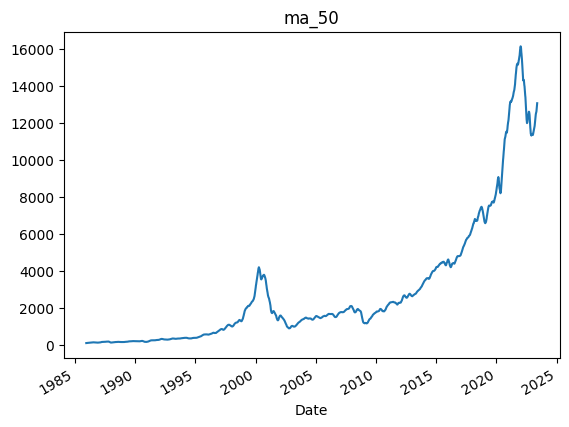

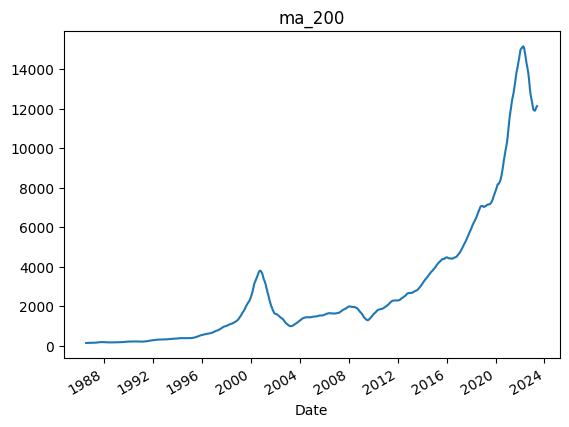

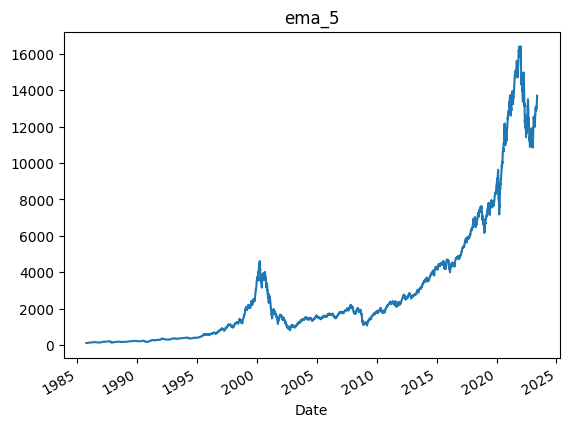

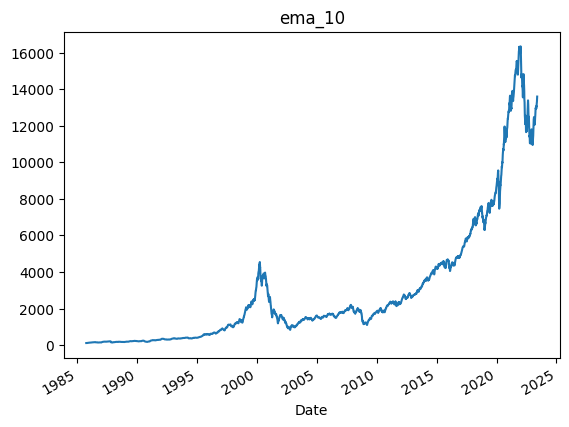

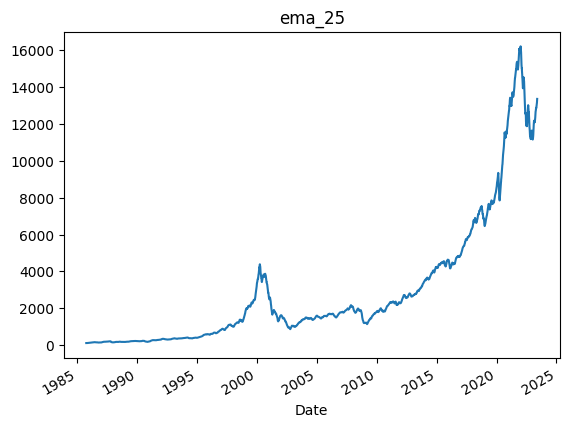

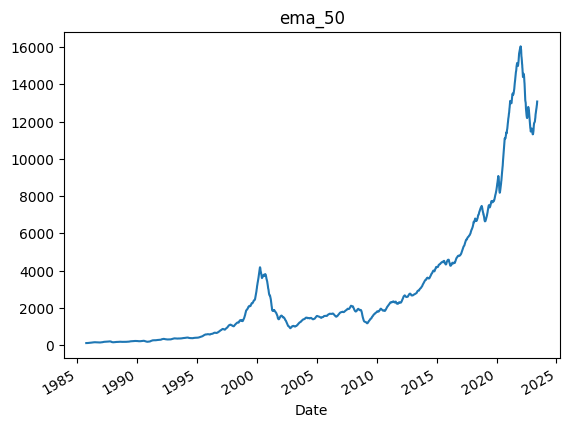

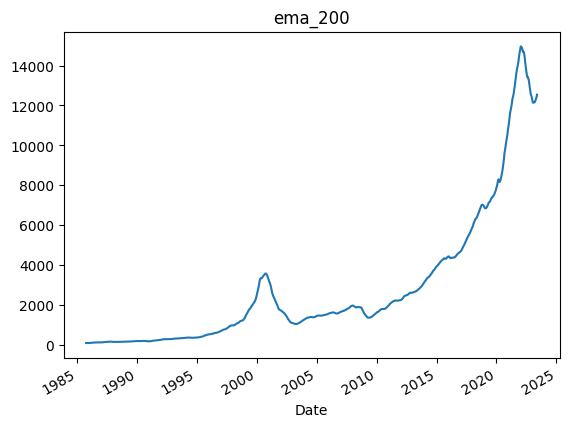

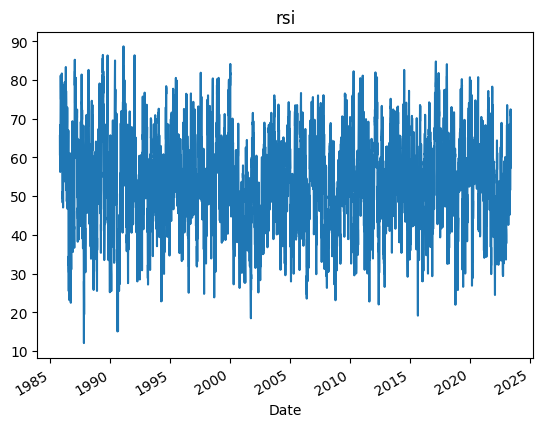

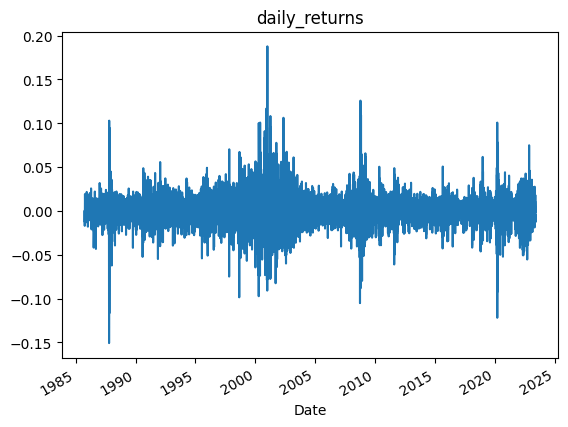

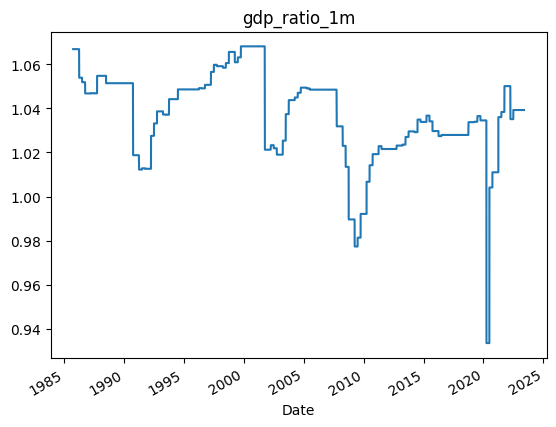

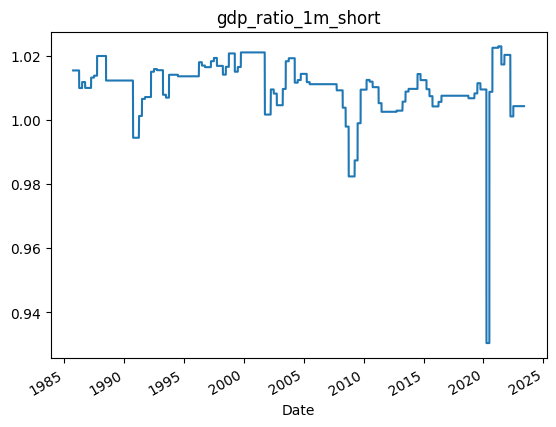

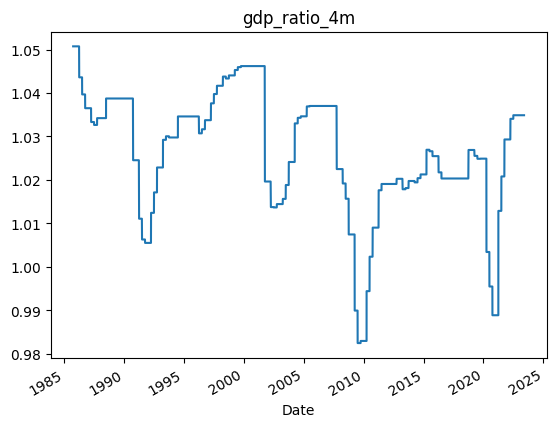

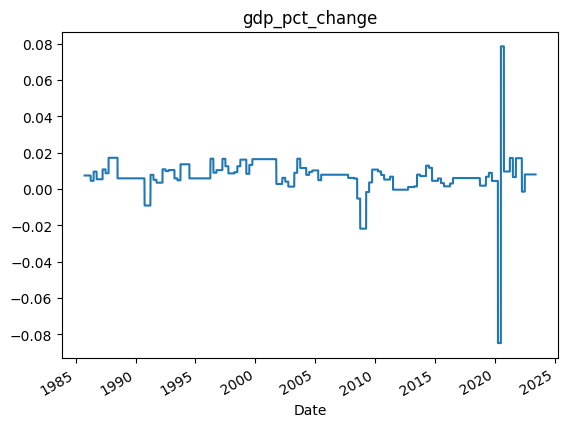

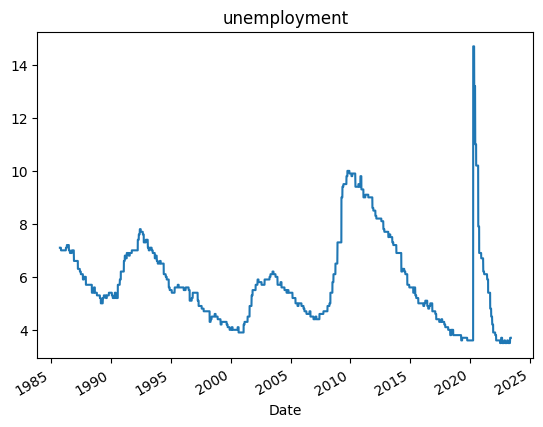

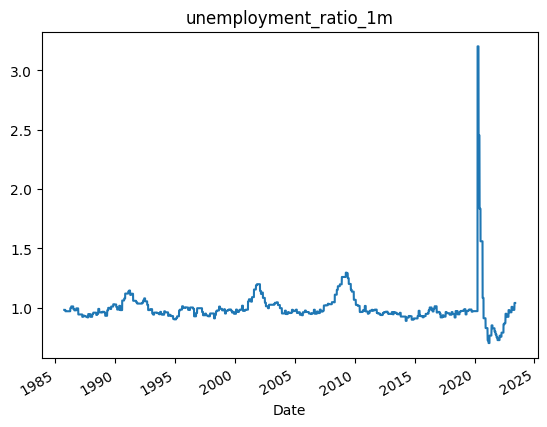

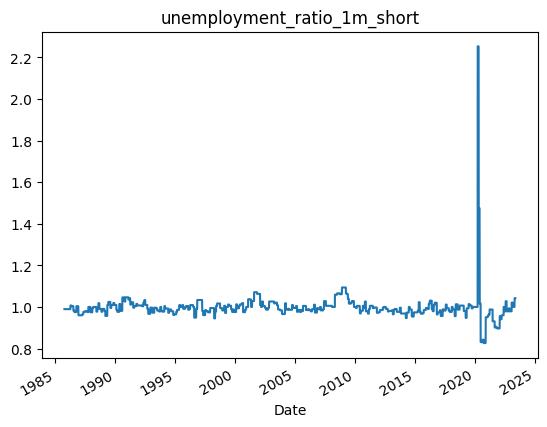

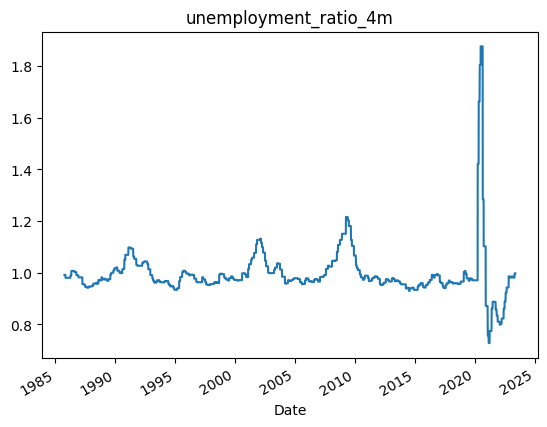

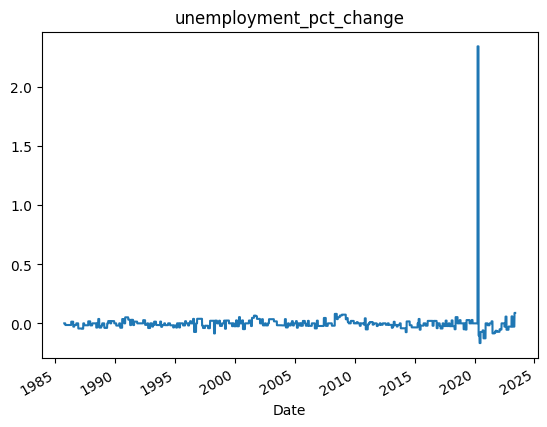

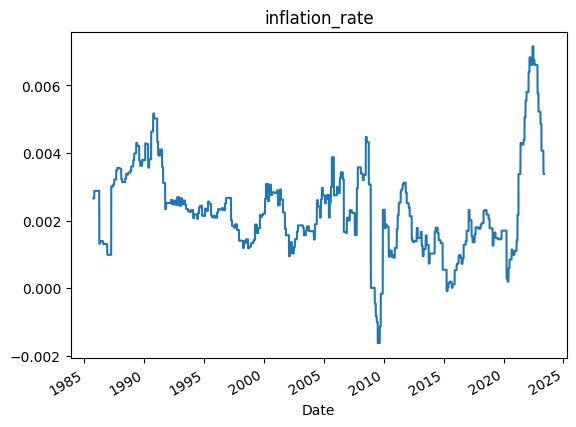

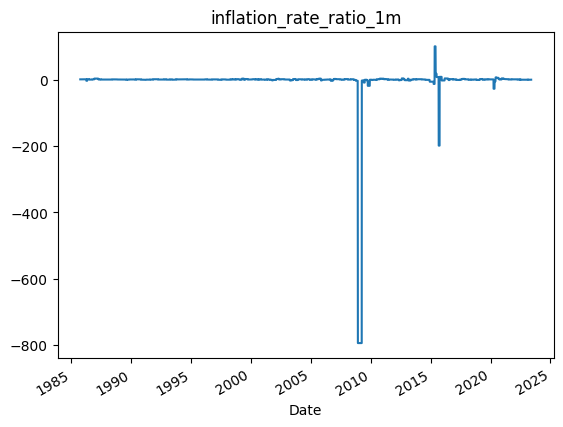

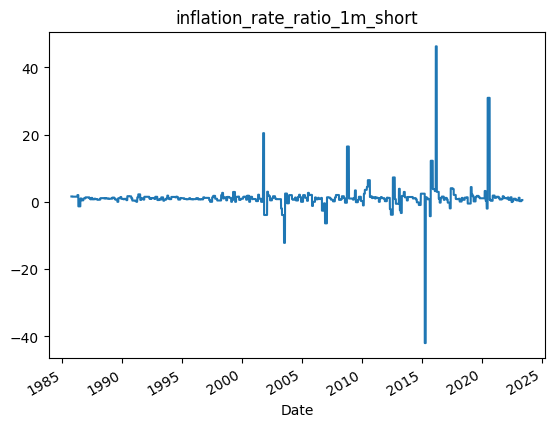

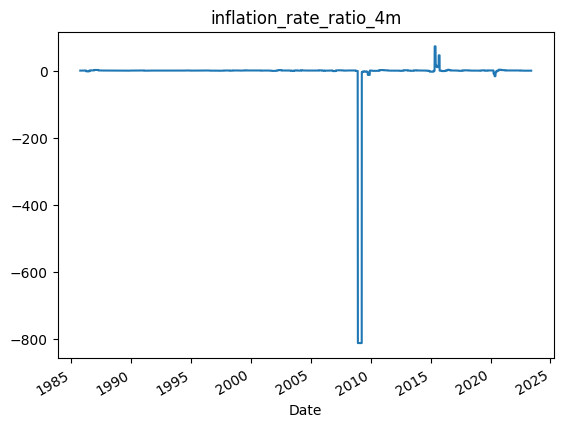

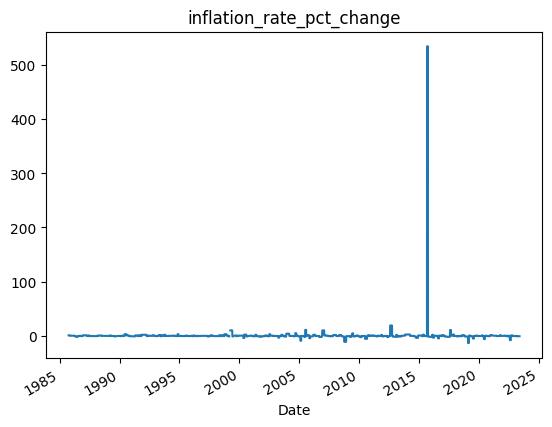

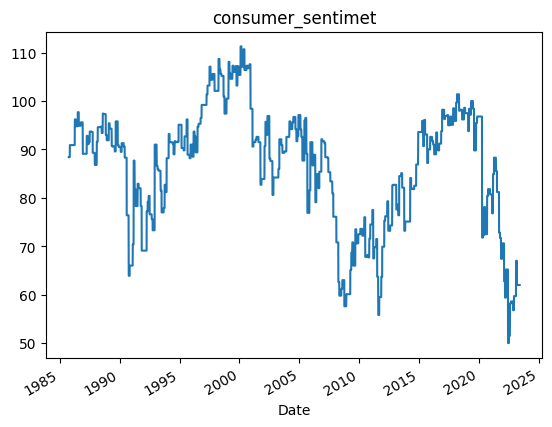

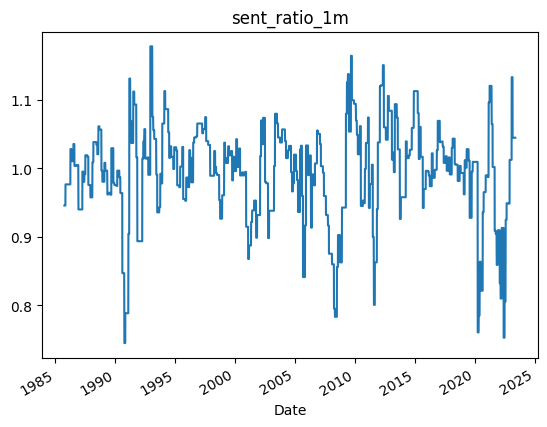

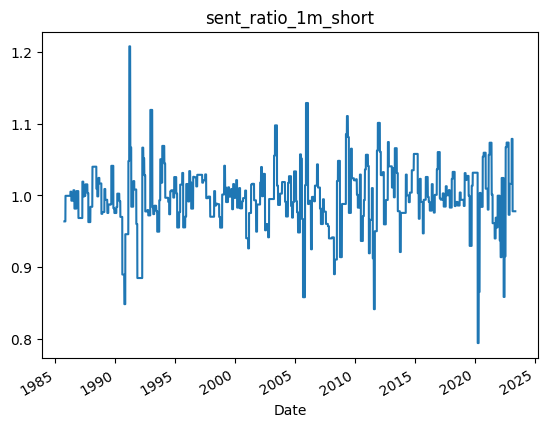

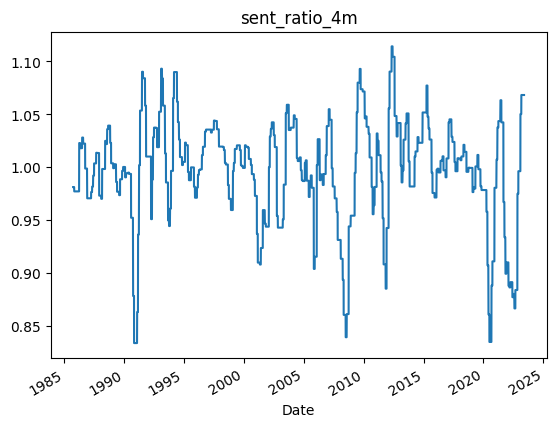

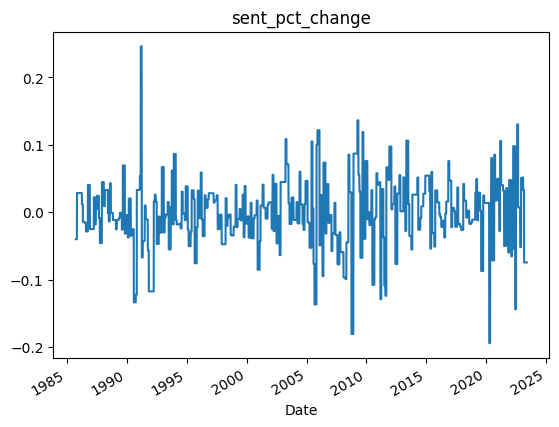

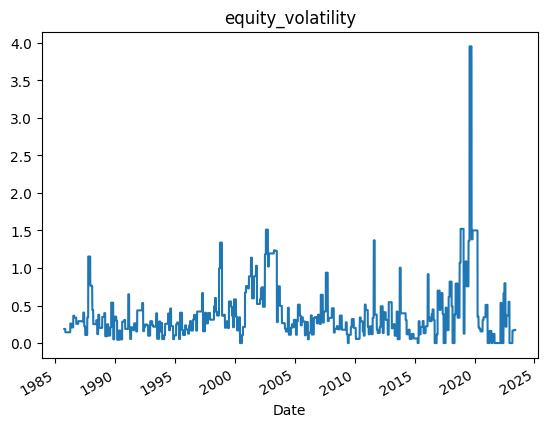

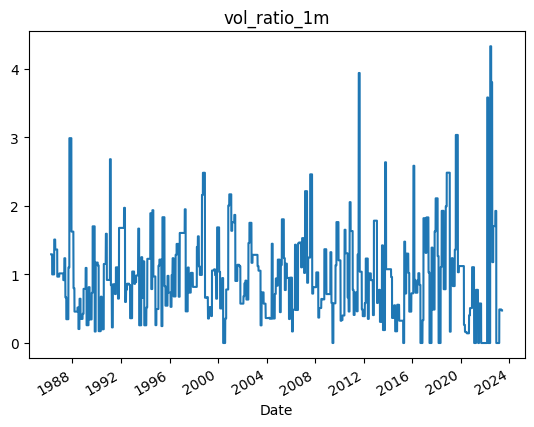

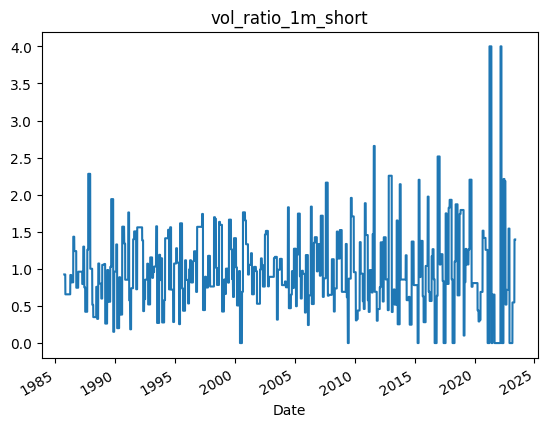

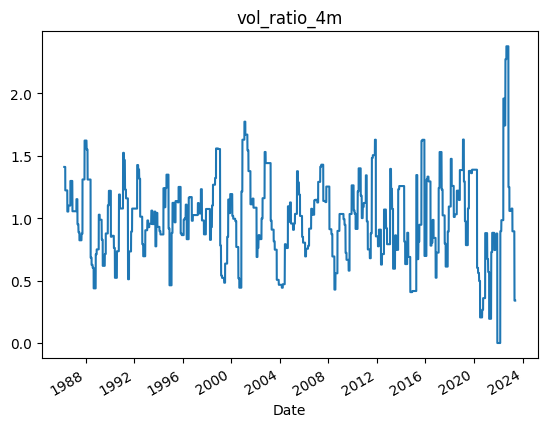

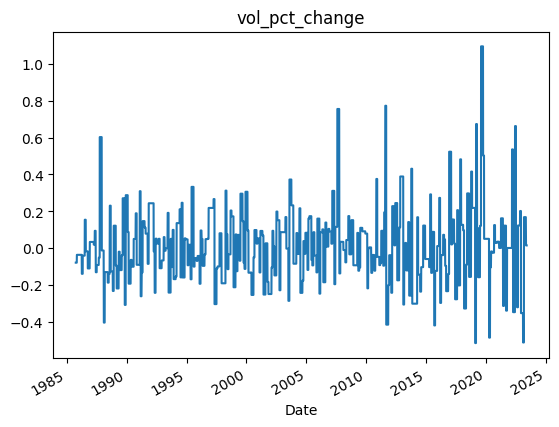

In [25]:
#plot the data for each column
for column in dataset.columns:
    dataset[column].fillna(method='ffill').plot()
    plt.title(column)
    plt.show()

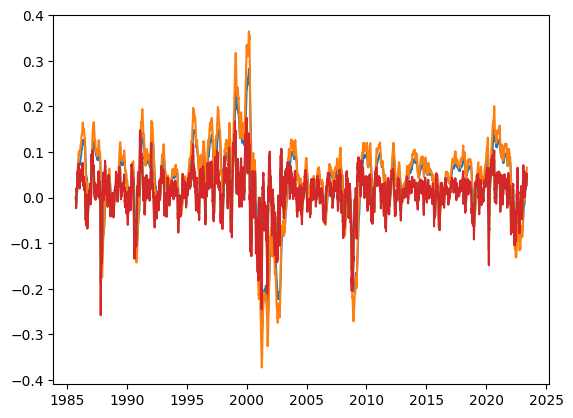

In [26]:
#ema50 - ema200
dataset['norm_ema_ratio_50'] = (dataset['ema_50'] - dataset['ema_200'])/dataset['ema_200']
dataset['norm_ema_ratio_25'] = (dataset['ema_25'] - dataset['ema_200'])/dataset['ema_200']
dataset['norm_ema_ratio_10'] = (dataset['ema_10'] - dataset['ema_50'])/dataset['ema_50']
dataset['norm_ema_ratio_5'] = (dataset['ema_5'] - dataset['ema_50'])/dataset['ema_50']
plt.plot(dataset['norm_ema_ratio_50'])
plt.plot(dataset['norm_ema_ratio_25'])
plt.plot(dataset['norm_ema_ratio_10'])
plt.plot(dataset['norm_ema_ratio_5'])

# Create a new column that identifies when the EMAs cross over each other
dataset["EMA_crossover"] = ((dataset['norm_ema_ratio_50'].shift(1) < 0) & (dataset['norm_ema_ratio_50'] > 0)).astype(int)


In [27]:
#rsa moving average
dataset['rsi_ma_50'] = dataset['rsi'].rolling(window=50).mean()
dataset['rsi_ma_25'] = dataset['rsi'].rolling(window=25).mean()
dataset['rsi_ma_100'] = dataset['rsi'].rolling(window=100).mean()
dataset['rsi_ma_200'] = dataset['rsi'].rolling(window=200).mean()

In [28]:
dataset['Adj Close'].shift(1)

Date
1985-10-01             NaN
1985-10-02      112.139999
1985-10-03      110.824997
1985-10-04      110.870003
1985-10-07      110.074997
                  ...     
2023-05-18    13589.259766
2023-05-19    13834.620117
2023-05-22    13803.490234
2023-05-23    13849.740234
2023-05-24    13672.540039
Name: Adj Close, Length: 9489, dtype: float64

In [29]:
# Calculate the rolling mean over a window of thirty days
rolling_mean = dataset['Adj Close'].rolling(window=7).mean()
dataset['percent_increase_smooth'] = (dataset['Adj Close'].shift(-1*pred_preiod) - rolling_mean) / rolling_mean * 100

In [34]:
dataset['percent_increase_smooth'].mean()

0.7787795964204688

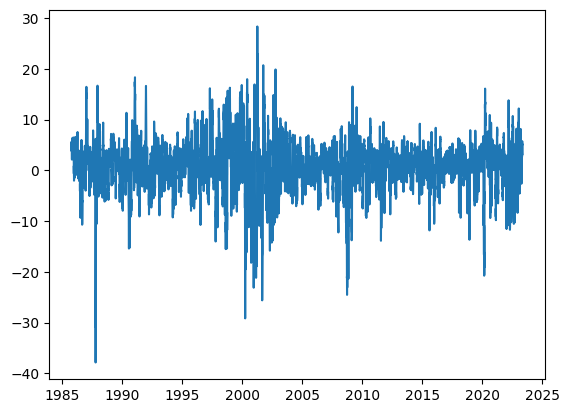

In [30]:
plt.plot(dataset['percent_increase_smooth'])

In [31]:
latest_values = dataset.fillna(method='ffill').iloc[-1]

In [32]:
#Adjust data for real time
#gdp  #Lags behind 6 months
#inflation  #Lags behind 2 months
#unemployment  #lags behind 3 months
#dataset['consumer_sentimet'] #lags behind 3 mo
#dataset['equity_volatility'] #lags behind 2 mo

#shift the data


In [33]:
dataset['gdp_ratio_1m'] = dataset['gdp_ratio_1m'].shift(6*20)
dataset['gdp_ratio_1m_short'] = dataset['gdp_ratio_1m_short'].shift(6*20)
dataset['gdp_ratio_4m'] = dataset['gdp_ratio_4m'].shift(6*20)
dataset['gdp_pct_change'] = dataset['gdp_pct_change'].shift(6*20)

dataset['unemployment'] = dataset['unemployment'].shift(3*20)
dataset['unemployment_ratio_1m'] = dataset['unemployment_ratio_1m'].shift(3*20)
dataset['unemployment_ratio_1m_short'] = dataset['unemployment_ratio_1m_short'].shift(3*20)
dataset['unemployment_ratio_4m'] = dataset['unemployment_ratio_4m'].shift(3*20)
dataset['unemployment_pct_change'] = dataset['unemployment_pct_change'].shift(3*20)

dataset['inflation_rate'] = dataset['inflation_rate'].shift(2*20)
dataset['inflation_rate_ratio_1m'] = dataset['inflation_rate_ratio_1m'].shift(2*20)
dataset['inflation_rate_ratio_1m_short'] = dataset['inflation_rate_ratio_1m_short'].shift(2*20)
dataset['inflation_rate_ratio_4m'] = dataset['inflation_rate_ratio_4m'].shift(2*20)
dataset['inflation_rate_pct_change'] = dataset['inflation_rate_pct_change'].shift(2*20)

dataset['consumer_sentimet'] = dataset['consumer_sentimet'].shift(3*20)
dataset['sent_ratio_1m'] = dataset['sent_ratio_1m'].shift(3*20)
dataset['sent_ratio_1m_short'] = dataset['sent_ratio_1m_short'].shift(3*20)
dataset['sent_ratio_4m'] = dataset['sent_ratio_4m'].shift(3*20)
dataset['sent_pct_change'] = dataset['sent_pct_change'].shift(3*20)

dataset['equity_volatility'] = dataset['equity_volatility'].shift(2*20)
dataset['vol_ratio_1m'] = dataset['vol_ratio_1m'].shift(2*20)
dataset['vol_ratio_1m_short'] = dataset['vol_ratio_1m_short'].shift(2*20)
dataset['vol_ratio_4m'] = dataset['vol_ratio_4m'].shift(2*20)
dataset['vol_pct_change'] = dataset['vol_pct_change'].shift(2*20)


In [34]:
print(dataset.columns)
cols_to_model = ['norm_ema_ratio_50', 'norm_ema_ratio_25', 'norm_ema_ratio_10', 'norm_ema_ratio_5', 
        'EMA_crossover', 'rsi', 'rsi_ma_25','rsi_ma_50','rsi_ma_100', 'rsi_ma_200',
        'gdp_ratio_1m', 'gdp_ratio_1m_short', 'gdp_ratio_4m', 'gdp_pct_change',
       'unemployment', 'unemployment_ratio_1m', 'unemployment_ratio_1m_short', 'unemployment_ratio_4m', 'unemployment_pct_change',
       'consumer_sentimet', 'sent_ratio_1m', 'sent_ratio_1m_short', 'sent_ratio_4m', 'sent_pct_change',
       'inflation_rate', 'inflation_rate_ratio_1m', 'inflation_rate_ratio_1m_short', 'inflation_rate_ratio_4m', #'inflation_rate_pct_change',
       'equity_volatility', 'vol_ratio_1m', 'vol_ratio_1m_short', 'vol_ratio_4m', 'vol_pct_change']

# cols_to_model = [
#         'unemployment_ratio_1m', 'unemployment_ratio_1m_short', 'unemployment_ratio_4m', 'unemployment_pct_change',
#        'inflation_rate_ratio_1m', 'inflation_rate_ratio_1m_short', 'inflation_rate_ratio_4m', 'inflation_rate_pct_change',
#        'equity_volatility']

#percent_inc = (dataset['Adj Close'].shift(-1)/dataset['Adj Close'] - 1)
#find the percent increase over the next 30 days
percent_inc_30 = dataset['percent_increase_smooth']
#percent_inc = (dataset['Adj Close'].shift(-7) / dataset['Adj Close'] - 1) * 100 / 7
y = percent_inc_30.shift(-1)
dataset['pct_growth'] = y
dataset = dataset[:-31]

Index(['Adj Close', 'ma_50', 'ma_200', 'ema_5', 'ema_10', 'ema_25', 'ema_50',
       'ema_200', 'rsi', 'daily_returns', 'gdp_ratio_1m', 'gdp_ratio_1m_short',
       'gdp_ratio_4m', 'gdp_pct_change', 'unemployment',
       'unemployment_ratio_1m', 'unemployment_ratio_1m_short',
       'unemployment_ratio_4m', 'unemployment_pct_change', 'inflation_rate',
       'inflation_rate_ratio_1m', 'inflation_rate_ratio_1m_short',
       'inflation_rate_ratio_4m', 'inflation_rate_pct_change',
       'consumer_sentimet', 'sent_ratio_1m', 'sent_ratio_1m_short',
       'sent_ratio_4m', 'sent_pct_change', 'equity_volatility', 'vol_ratio_1m',
       'vol_ratio_1m_short', 'vol_ratio_4m', 'vol_pct_change',
       'norm_ema_ratio_50', 'norm_ema_ratio_25', 'norm_ema_ratio_10',
       'norm_ema_ratio_5', 'EMA_crossover', 'rsi_ma_50', 'rsi_ma_25',
       'rsi_ma_100', 'rsi_ma_200', 'percent_increase_smooth'],
      dtype='object')


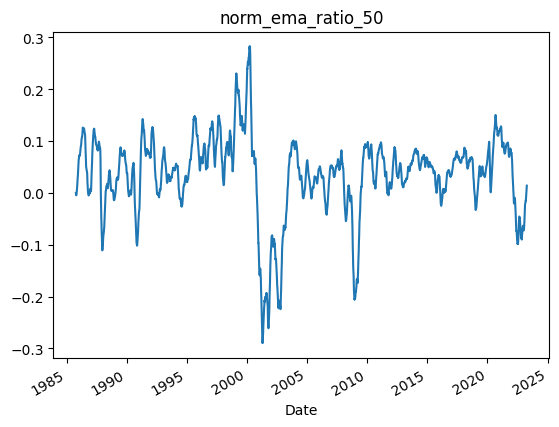

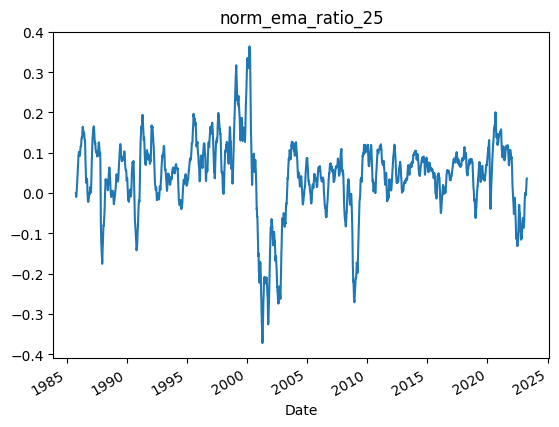

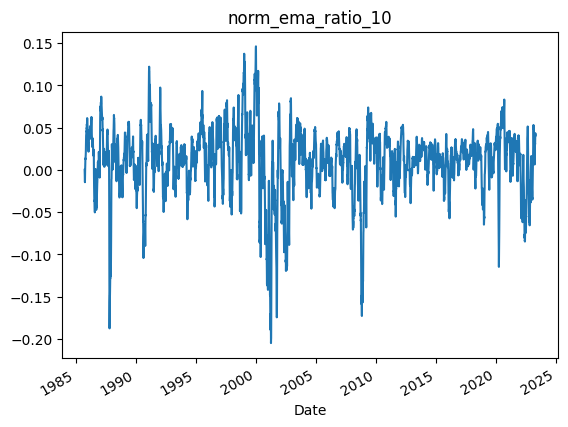

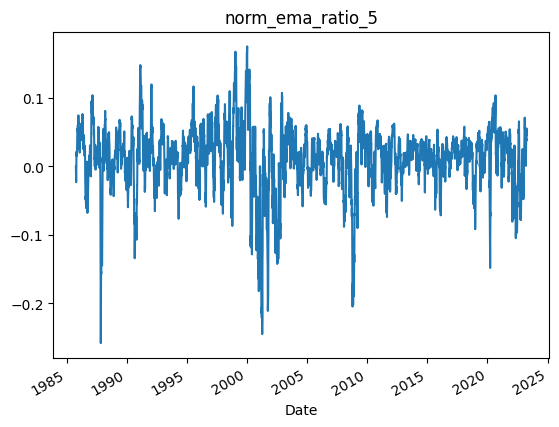

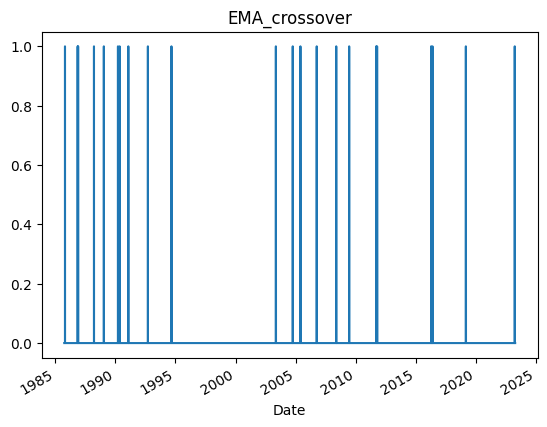

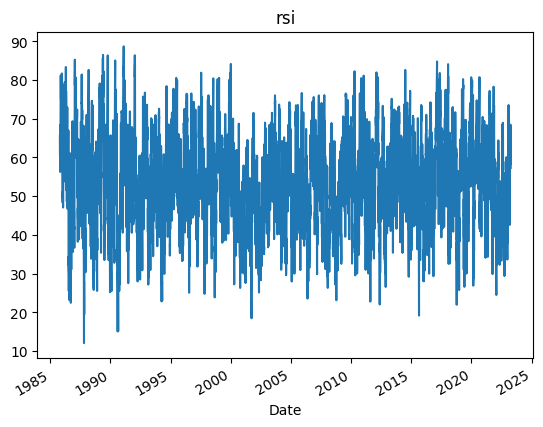

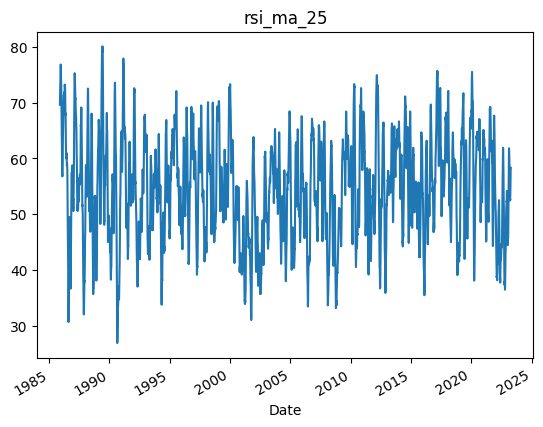

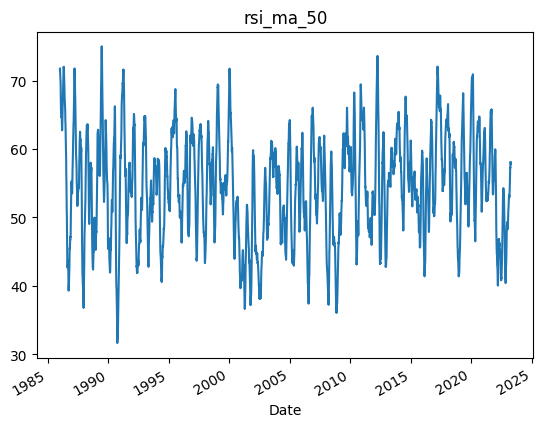

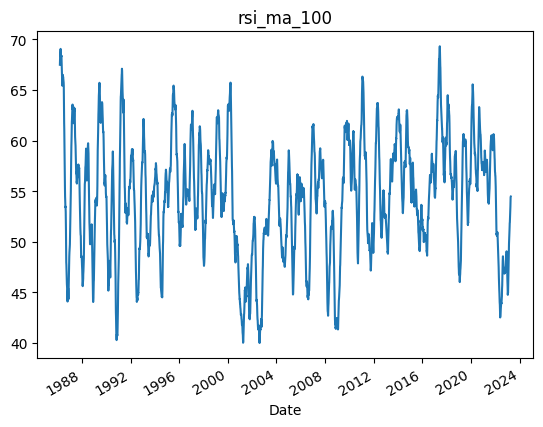

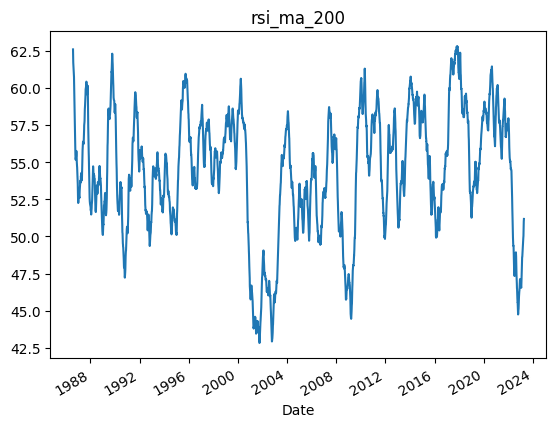

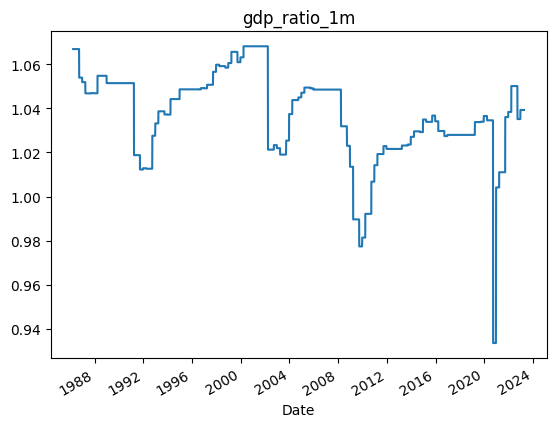

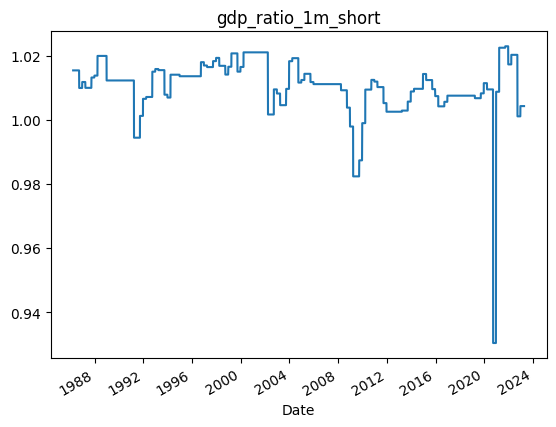

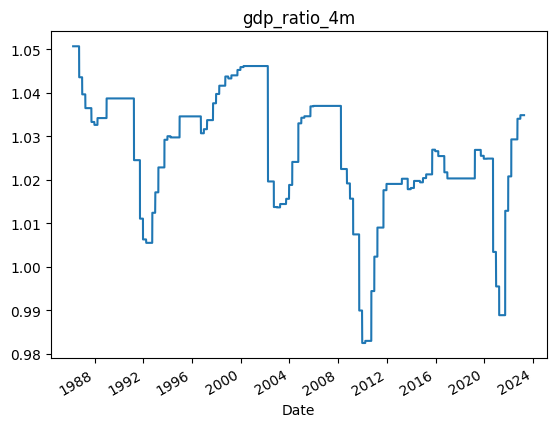

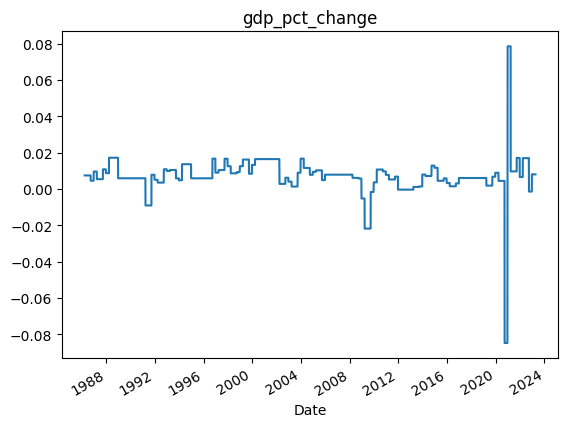

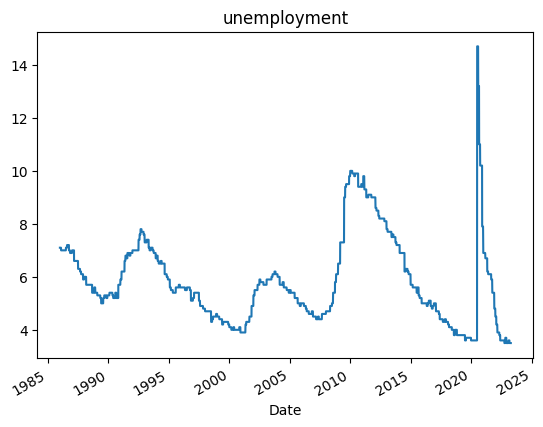

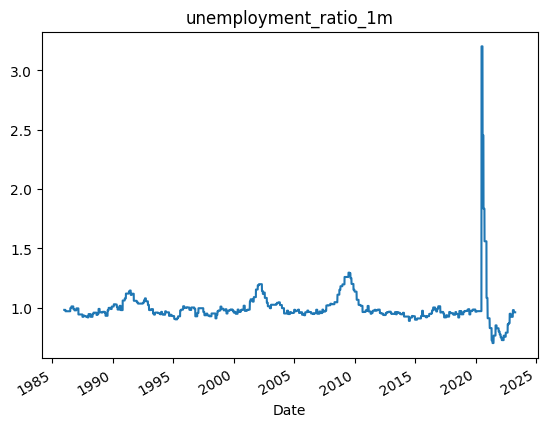

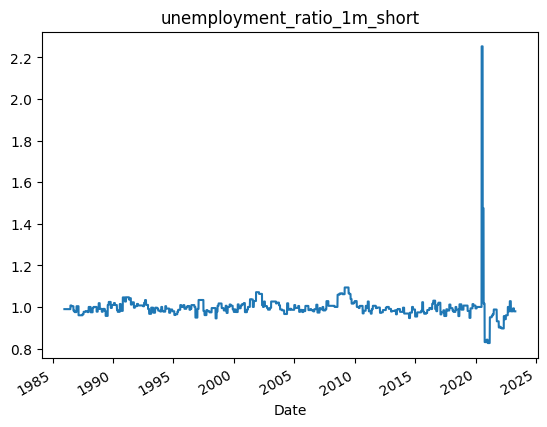

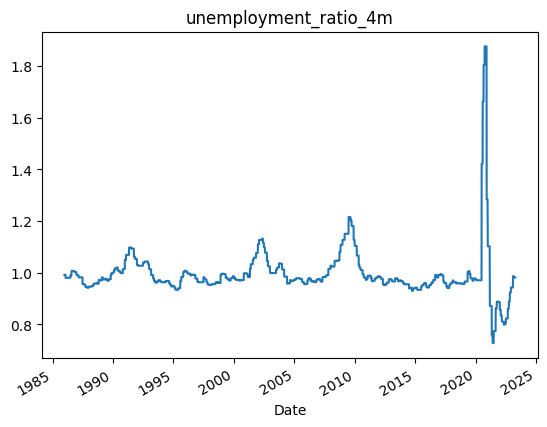

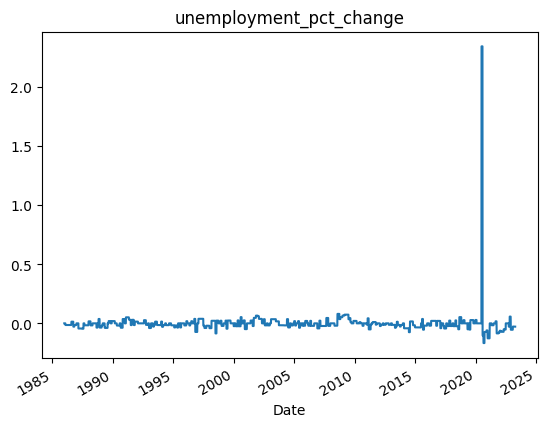

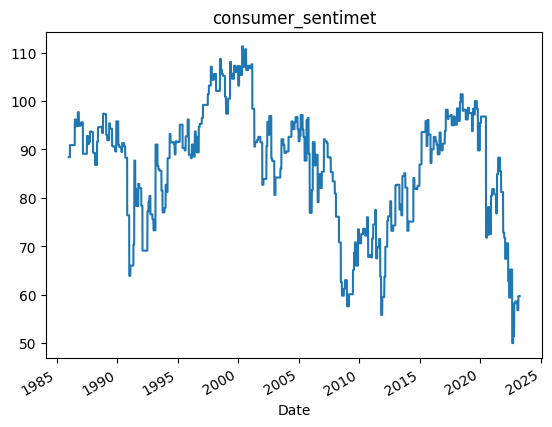

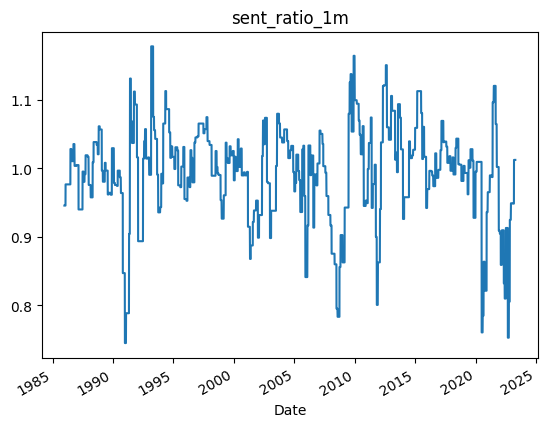

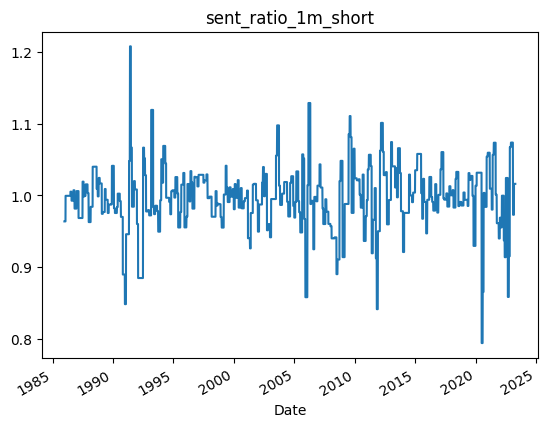

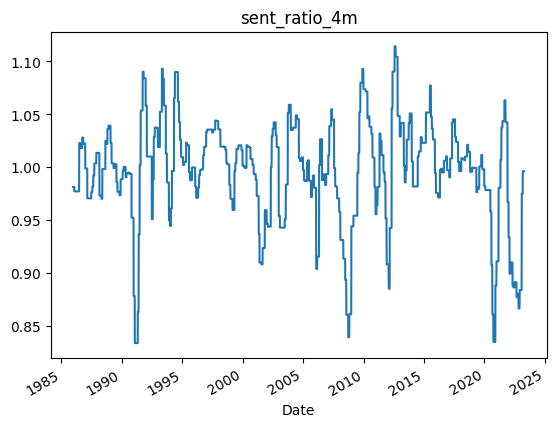

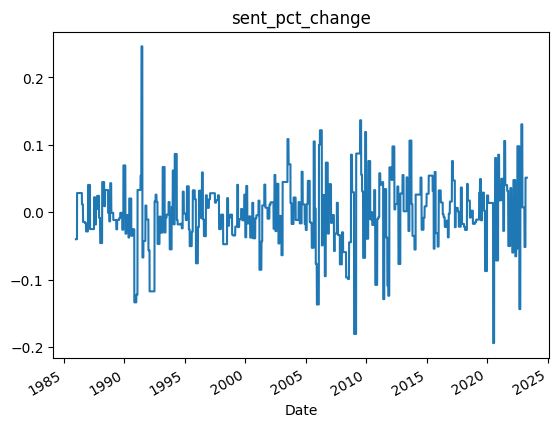

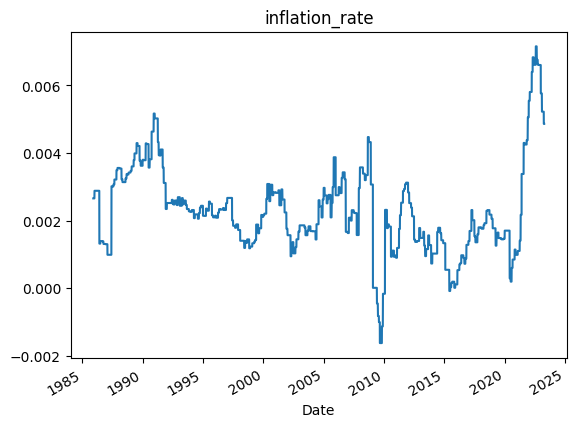

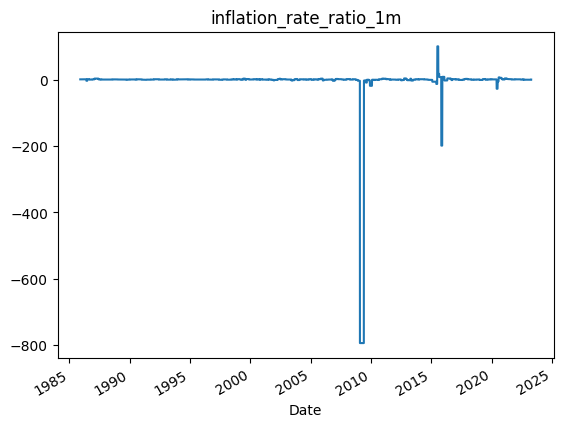

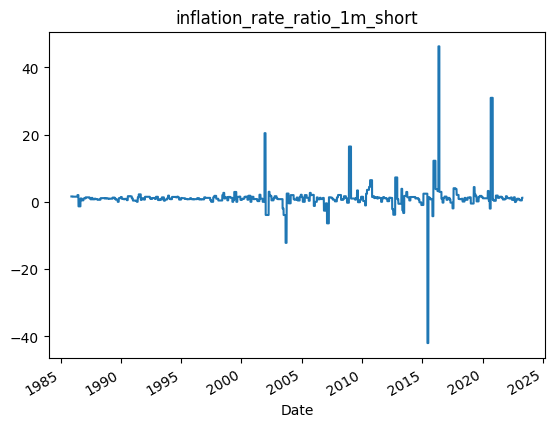

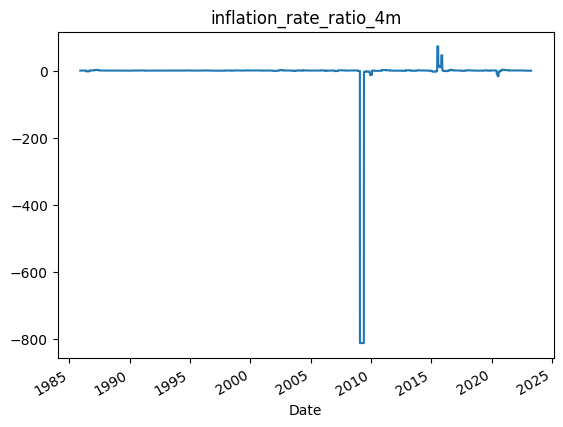

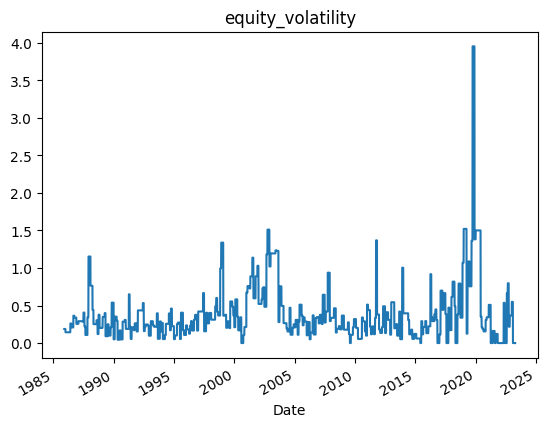

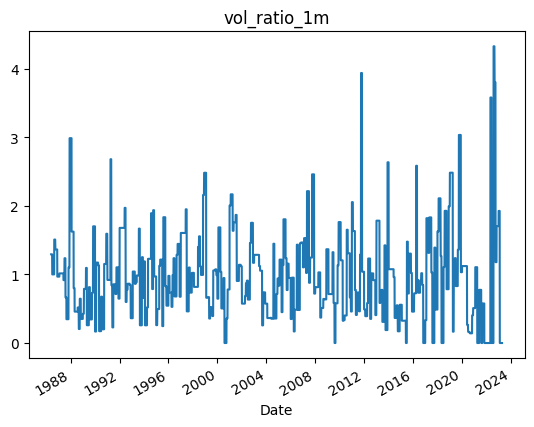

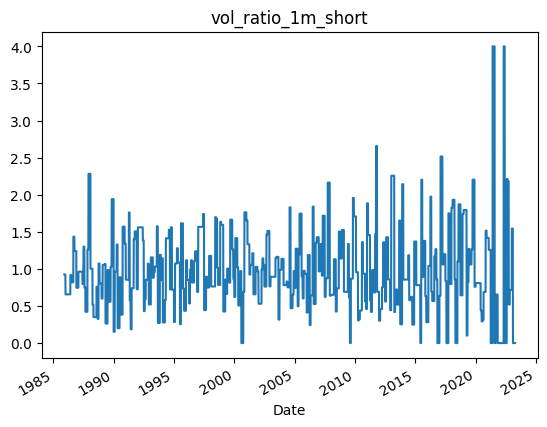

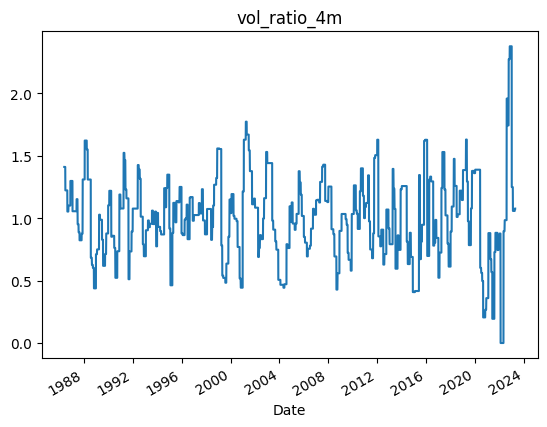

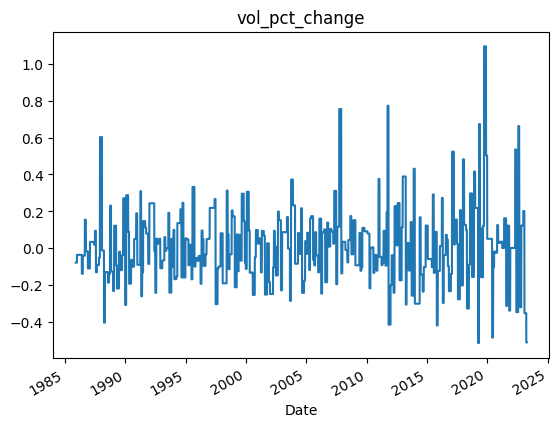

In [35]:

for column in cols_to_model:
    dataset[column].fillna(method='ffill').plot()
    plt.title(column)
    plt.show()

In [36]:
dataset['pct_growth'].median()

1.1450844402795601

In [37]:
#dataset['y'] = .5
#dataset.loc[dataset['pct_growth'] > dataset['pct_growth'].median(), 'y'] = 1
#dataset.loc[dataset['pct_growth'] < dataset['pct_growth'].median(), 'y'] = 0
dataset['y'] = dataset['pct_growth']

In [38]:
#get number of 1s and 0s
dataset['y'].value_counts()


y
 4.890614    1
 5.188330    1
 2.786438    1
 2.584154    1
 4.638879    1
            ..
 1.123910    1
 2.021968    1
 1.115451    1
 1.037010    1
-1.642050    1
Name: count, Length: 9453, dtype: int64

In [39]:
X = dataset[cols_to_model].fillna(method='ffill')
latest_values = latest_values[cols_to_model]
y = dataset['y']
pct_change =  dataset['pct_growth']

In [40]:
#get nan values in X
X.isna().sum()

norm_ema_ratio_50                  0
norm_ema_ratio_25                  0
norm_ema_ratio_10                  0
norm_ema_ratio_5                   0
EMA_crossover                      0
rsi                               13
rsi_ma_25                         37
rsi_ma_50                         62
rsi_ma_100                       112
rsi_ma_200                       212
gdp_ratio_1m                     120
gdp_ratio_1m_short               120
gdp_ratio_4m                     120
gdp_pct_change                   120
unemployment                      60
unemployment_ratio_1m             60
unemployment_ratio_1m_short       60
unemployment_ratio_4m             60
unemployment_pct_change           60
consumer_sentimet                 60
sent_ratio_1m                     60
sent_ratio_1m_short               60
sent_ratio_4m                     60
sent_pct_change                   60
inflation_rate                    40
inflation_rate_ratio_1m           40
inflation_rate_ratio_1m_short     40
i

In [41]:
X = X[212:].astype(float)
y = y[212:]
dates = dataset.index[212:]
pct_change = pct_change[212:]
pct_returns = dataset['daily_returns'][212:]

In [42]:
len(X)

9246

In [43]:
len(dates)

9246

In [44]:
#get inf values in X
X.isin([np.inf, -np.inf]).sum()

norm_ema_ratio_50                0
norm_ema_ratio_25                0
norm_ema_ratio_10                0
norm_ema_ratio_5                 0
EMA_crossover                    0
rsi                              0
rsi_ma_25                        0
rsi_ma_50                        0
rsi_ma_100                       0
rsi_ma_200                       0
gdp_ratio_1m                     0
gdp_ratio_1m_short               0
gdp_ratio_4m                     0
gdp_pct_change                   0
unemployment                     0
unemployment_ratio_1m            0
unemployment_ratio_1m_short      0
unemployment_ratio_4m            0
unemployment_pct_change          0
consumer_sentimet                0
sent_ratio_1m                    0
sent_ratio_1m_short              0
sent_ratio_4m                    0
sent_pct_change                  0
inflation_rate                   0
inflation_rate_ratio_1m          0
inflation_rate_ratio_1m_short    0
inflation_rate_ratio_4m          0
equity_volatility   

In [45]:
#drop values where y is 0
# X = X[y != .5]
# pct_change = pct_change[y != .5]
# dates = dates[y != .5]
# y = y[y != .5]


In [46]:
#split y to be values greater and less than the mean
# mean_y = y.median()
# y[y <= mean_y] = 0
# y[y > mean_y] = 1

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

seed = 42

kf = KFold(n_splits=5, shuffle=False)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)
# # Fit the scaler to your data to calculate the mean and standard deviation

scaler.fit(X_train)

#get nan values in dataset
print(X_train.isna().sum())

# # Apply the scaler to your data to transform it to a normalized form
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_scaled = scaler.transform(X)
latest_values_scaled = scaler.transform(latest_values[cols_to_model].values.reshape(1, -1))


norm_ema_ratio_50                0
norm_ema_ratio_25                0
norm_ema_ratio_10                0
norm_ema_ratio_5                 0
EMA_crossover                    0
rsi                              0
rsi_ma_25                        0
rsi_ma_50                        0
rsi_ma_100                       0
rsi_ma_200                       0
gdp_ratio_1m                     0
gdp_ratio_1m_short               0
gdp_ratio_4m                     0
gdp_pct_change                   0
unemployment                     0
unemployment_ratio_1m            0
unemployment_ratio_1m_short      0
unemployment_ratio_4m            0
unemployment_pct_change          0
consumer_sentimet                0
sent_ratio_1m                    0
sent_ratio_1m_short              0
sent_ratio_4m                    0
sent_pct_change                  0
inflation_rate                   0
inflation_rate_ratio_1m          0
inflation_rate_ratio_1m_short    0
inflation_rate_ratio_4m          0
equity_volatility   

/Users/andrew/opt/anaconda3/envs/trading_modeling/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# #seperate the data into 
# #split the training into 5 fold cross validation
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# scaler = StandardScaler()

# seed = 42

# kf = KFold(n_splits=5, shuffle=False)

# #split the data into training and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)
# # # Fit the scaler to your data to calculate the mean and standard deviation

# scaler.fit(X_train)

# #get nan values in dataset
# print(X_train.isna().sum())

# # # Apply the scaler to your data to transform it to a normalized form
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# #count number of nan values in X_train_scaled
# print(np.isinf(X_train_scaled).sum())

# #split train into 5 fold cross validation
# kf = KFold(n_splits=5, shuffle=False)

# scores = []
# correlations = []
# preds = []
# gt = []
# for train_idx, val_idx in kf.split(X_train_scaled):
#     # split the data into training and validation sets for this fold
#     train_X, val_X = X_train_scaled[train_idx], X_train_scaled[val_idx]
#     train_y, val_y = y_train[train_idx], y_train[val_idx]

#     pct_change_train, pct_change_val = pct_change[train_idx], pct_change[val_idx]
#     #trainX and Y where percent_change < 0 or > 10

#     train_X = train_X[(pct_change_train < median-dist) | (pct_change_train > median+dist)]
#     train_y = train_y[(pct_change_train < median-dist) | (pct_change_train > median+dist)]

#     #count number of nan values in X_train_scaled
#     print(np.isnan(train_y).sum())

#     # fit the model for this fold
#     model = LinearRegression()
#     model.fit(train_X, train_y)

#     #predict for this fold
#     pred = model.predict(val_X)
#     preds.append(pred)
#     gt.append(val_y)

#     #calculate rmse for this fold
#     rmse = np.sqrt(np.mean((model.predict(val_X) - val_y) ** 2))
#     scores.append(rmse)

#     #calculate correlation for this fold
#     corr = np.corrcoef(model.predict(val_X), val_y)[0, 1]
#     correlations.append(corr)

# print(scores)
# print(correlations)

In [49]:
# for train_idx, val_idx in kf.split(X_train_scaled):
#     min_val_idx = min(val_idx)
#     max_val_idx = max(val_idx)
#     train_idx = [i for i in train_idx if i < min_val_idx-30 and i > max_val_idx]

In [50]:
len(y)

9246

In [51]:
#create use XGBoost model for regression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

seed = 42

kf = KFold(n_splits=5, shuffle=False)

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=False)

# # Fit the scaler to your data to calculate the mean and standard deviation
scaler.fit(X_train)

#get nan values in dataset
print(X_train.isna().sum())

# # Apply the scaler to your data to transform it to a normalized form
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



norm_ema_ratio_50                0
norm_ema_ratio_25                0
norm_ema_ratio_10                0
norm_ema_ratio_5                 0
EMA_crossover                    0
rsi                              0
rsi_ma_25                        0
rsi_ma_50                        0
rsi_ma_100                       0
rsi_ma_200                       0
gdp_ratio_1m                     0
gdp_ratio_1m_short               0
gdp_ratio_4m                     0
gdp_pct_change                   0
unemployment                     0
unemployment_ratio_1m            0
unemployment_ratio_1m_short      0
unemployment_ratio_4m            0
unemployment_pct_change          0
consumer_sentimet                0
sent_ratio_1m                    0
sent_ratio_1m_short              0
sent_ratio_4m                    0
sent_pct_change                  0
inflation_rate                   0
inflation_rate_ratio_1m          0
inflation_rate_ratio_1m_short    0
inflation_rate_ratio_4m          0
equity_volatility   

<Axes: >

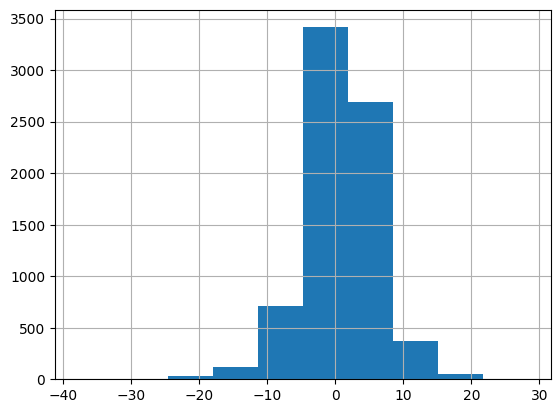

In [52]:
y_train.hist()

In [53]:
#remove values that don't matter much
mean_dist = np.mean(y_train)
print(mean_dist)

0.7395347658555934


In [54]:
len(y_train)

7396

In [55]:
X_train_scaled.shape

(7396, 33)

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

classification = False
if(classification):
    param_dist = {
        'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.5),
        'n_estimators': randint(50, 500),
        'min_child_weight': randint(1, 10),
        'subsample': uniform(0.5, 0.5),
        'colsample_bytree': uniform(0.5, 0.5),
        'gamma': uniform(0, 2)
    }

    #y_train = np.where(y_train < 0, y_train, y_train)
    xgb_class = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    xgb_cv = RandomizedSearchCV(xgb_class, param_dist, cv=kf, n_iter=100, random_state=42, n_jobs=-1)
else:
    param_distributions = {
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'max_depth': [1, 2, 3, 5, 7, 9, 13],
        'n_estimators': [1,2, 3, 5,10, 50, 100],
        'alpha': [0, 1, 10, 100, 1000],
        'colsample_bytree': [0.3, 0.5, 0.7, .9]
    }

    #y_train = np.where(y_train < 0, y_train, y_train)
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_cv = RandomizedSearchCV(xgb_reg, param_distributions, cv=kf, n_iter=100, random_state=42, n_jobs=-1)


trn_idxs = (y_train < mean_dist-dist) | (y_train > mean_dist+dist)
X_train_scaled_extreme, train_y_extreme = X_train_scaled[trn_idxs], y_train[trn_idxs]
xgb_cv.fit(X_train_scaled_extreme, train_y_extreme)

print(xgb_cv.best_params_)

# xgb_model = xgb.XGBRegressor(**xgb_cv.best_params_)
# xgb_model.fit(X_train_scaled, y_train)

# # Evaluate on test set
# test_pred = xgb_model.predict(X_test_scaled)
# test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
# test_corr = np.corrcoef(test_pred, y_test)[0, 1]

# print('Test RMSE:', test_rmse)
# print('Test correlation:', test_corr)

{'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7, 'alpha': 1000}


In [57]:
configs = xgb_cv.best_params_

train_scores = []
scores = []
correlations = []
preds = []
gt = []
for train_idx, val_idx in kf.split(X_train_scaled):

    min_val_idx = min(val_idx)
    max_val_idx = max(val_idx)
    train_idx = [i for i in train_idx if i < min_val_idx-pred_preiod or i > max_val_idx]

    # split the data into training and validation sets for this fold
    train_X, val_X = X_train_scaled[train_idx], X_train_scaled[val_idx]
    train_y, val_y = y_train[train_idx], y_train[val_idx]
    #add more weight to values < 0

    #trainX and Y where percent_change < 0 or > 10
    trn_idxs = (train_y < mean_dist-dist) | (train_y > mean_dist+dist)
    train_X, train_y = train_X[trn_idxs], train_y[trn_idxs]
    
    #load xgb model from config
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **configs)

    xgb_model.fit(train_X, train_y)

    #predict for this fold
    pred = xgb_model.predict(val_X)
    preds.append(pred)
    gt.append(val_y)

    train_rmse = np.sqrt(mean_squared_error(train_y, xgb_model.predict(train_X)))
    train_scores.append(train_rmse)

    #calculate rmse for this fold
    rmse = np.sqrt(np.mean((xgb_model.predict(val_X) - val_y) ** 2))
    scores.append(rmse)

    #calculate correlation for this fold
    corr = np.corrcoef(xgb_model.predict(val_X), val_y)[0, 1]
    correlations.append(corr)

print(train_scores)
print(scores)
print(correlations)

[4.946359086700042, 5.18328581002441, 4.1763178569491, 5.103912360958157, 5.31882335815665]
[5.337432766342228, 4.0504404975479105, 7.915599052243425, 4.513547807649813, 3.297333643207312]
[0.14150033671027584, 0.12134842728242827, 0.1750661542522638, 0.18838224173832968, 0.11358964669052922]


In [59]:
exp_preds = np.concatenate(preds)
pct_returns_train = pct_returns[:int(len(pct_change)*.8)]
pct_returns_test = pct_returns[int(len(pct_change)*.8):]

In [60]:
#here's the backtesting strategy
#If the model predicts a positive return, long the SNP500, if it falls below zero then short the SNP500
#Even though the predictions are a month away, this is a good way to backtest the model

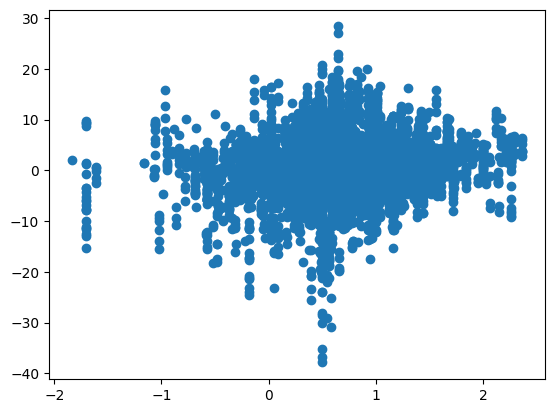

In [61]:
plt.scatter(exp_preds, y_train)

In [62]:
# from sklearn.metrics import roc_auc_score
# #calculate the correlation between the predictions and the actual values
# corr = np.corrcoef(exp_preds, gt)[0, 1]
# print(corr)
# roc_score = roc_auc_score(gt, exp_preds)
# roc_score = roc_auc_score(y_train, exp_preds)
# print(roc_score)

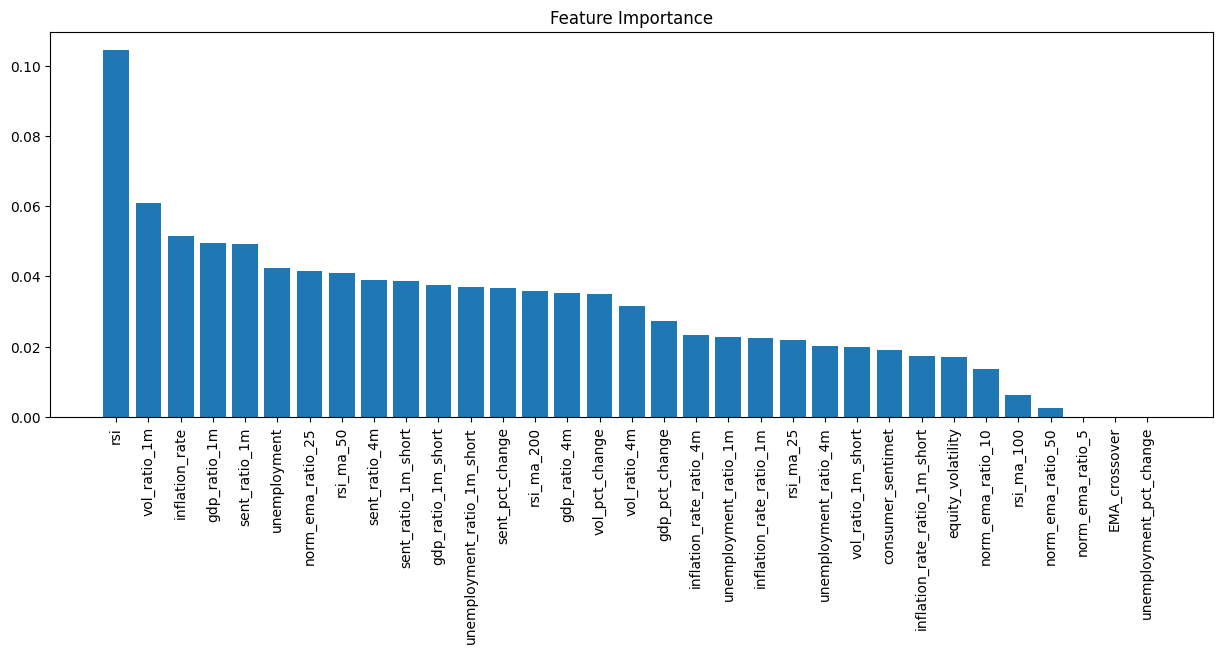

In [63]:
#find the most important features in the model
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]

#plot the most important features
plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), names, rotation=90)
plt.show()

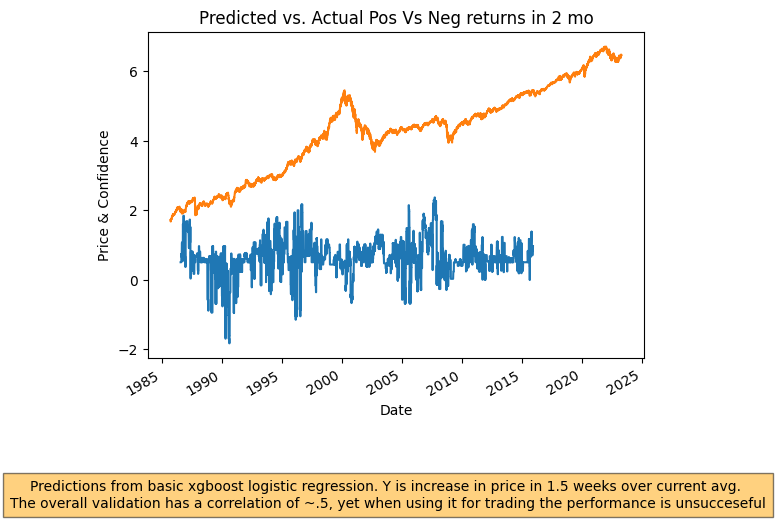

In [68]:
#plot exp_preds as a function of time
plt.plot(dates[:int(.8*len(dates))],exp_preds)
#plot dataset with adjusted close
#dataset['Adj Close'].plot()
#plot the log of the adjusted close
(np.log(dataset['Adj Close'])-3).plot()
plt.title('Predicted vs. Actual Pos Vs Neg returns in 2 mo')
plt.xlabel('Date')
plt.ylabel('Price & Confidence')
#add caption below plot
text = "Predictions from basic xgboost logistic regression. Y is increase in price in 1.5 weeks over current avg. \n"+\
        "The overall validation has a correlation of ~.5, yet when using it for trading the performance is unsucceseful"
plt.figtext(0.5, -0.11, text, ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()
#save plot to cache_notebooks/snp500_xgboost_classification.ipynb
#plt.savefig('../graph_results/snp500_xgboost_classification.png', bbox_inches='tight')

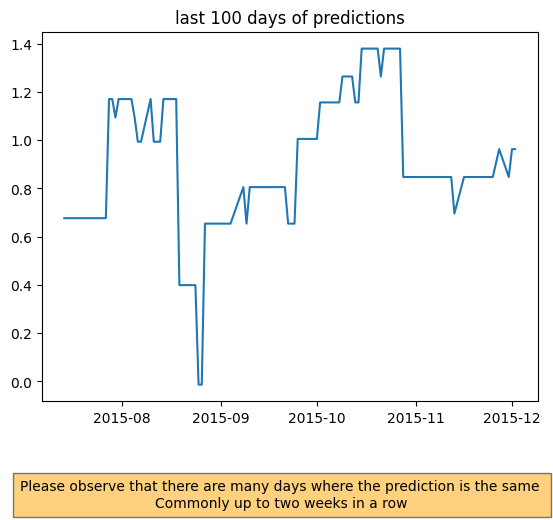

In [70]:
#plot exp_preds as a function of time
plt.plot(dates[:int(.8*len(dates))][-100:],exp_preds[-100:])
plt.title("last 100 days of predictions")
text = "Please observe that there are many days where the prediction is the same. \n"+\
        "Commonly up to two weeks in a row."
plt.figtext(0.5, -0.11, text, ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

In [1110]:
np.mean(exp_preds)
#get the 90th percentile of the predictions
np.percentile(exp_preds, 70)

0.8319200873374939

Finding the best threshold and days to hold for a strategy \
Logic is simple: Given an indicator. If it goes above a threshold, we buy and hold for a certain numebr of days \
We do random search to find the best threshold and days to hold

In [1111]:
percentile_lst = []
days_to_hold_lst = []
returns = []
returns_calc_2 = []
run_strategy_hp_search = False


if(run_strategy_hp_search):
    for percentile_threshold in [70,75,80,85,90]:
        for days_to_hold in [7, 15, 30, 60, 120]:
            threshold = np.percentile(exp_preds, percentile_threshold)

            dates_in_pos_mo = []
            for i in dates[:int(.8*len(dates))][exp_preds > threshold]:
                for j in pd.date_range(i, periods=days_to_hold, freq='D'):
                    if (j not in dates_in_pos_mo):
                        dates_in_pos_mo.append(j)
            dates_in_pos_mo = [i for i in dates_in_pos_mo if i in dates[:int(.8*len(dates))]]
            #make dates_in_pos_mo unique
            dates_in_pos_mo = sorted(list(set(dates_in_pos_mo)))
            train_dates = dates[:int(.8*len(dates))]

            model_returns = (1+pct_returns_train[train_dates.isin(dates_in_pos_mo)]).cumprod()
            pct_return = model_returns[-1] / np.array(([1.0002484] * len(model_returns))).cumprod()[-1]
            returns_calc_2 = (1+4*(pct_returns_train[train_dates.isin(dates_in_pos_mo)]-.0002484)).cumprod()[-1]


            percentile_lst.append(percentile_threshold)
            days_to_hold_lst.append(days_to_hold)
            returns.append(pct_return)

            print('Percent Return: ', pct_return, 'Returns_calc_2 ', returns_calc_2,  'Percentile Threshold: ', percentile_threshold, 'Days to Hold: ', days_to_hold)
#Percent Return:  2.3512213129425183 Percentile Threshold:  55 Days to Hold:  120


In [1112]:
threshold = np.percentile(exp_preds, 90)
threshold

1.3604110479354858

In [1113]:

# gt = pct_change[:int(len(pct_change)*.8)]
# gt_test = pct_change[int(len(pct_change)*.8):]
# pct_returns_test = pct_returns[int(len(pct_change)*.8):]

# plt.scatter(exp_preds, gt_test)
# plt.title('Predicted vs. Actual Pos Vs Neg returns in 2 mo')
# plt.xlabel('Predicted Inc Vs Dec')
# plt.ylabel('Actual')

In [1114]:
dates_in_pos_mo = []
for i in dates[:int(.8*len(dates))][exp_preds > threshold]:
    if(i not in dates_in_pos_mo):
        for j in pd.date_range(i, periods=14, freq='D'):
            if (j not in dates_in_pos_mo):
                dates_in_pos_mo.append(j)
dates_in_pos_mo = [i for i in dates_in_pos_mo if i in dates[:int(.8*len(dates))]]
#make dates_in_pos_mo unique
dates_in_pos_mo = sorted(list(set(dates_in_pos_mo)))

In [1115]:
train_dates = dates[:int(.8*len(dates))]
train_pct_growth = dataset['pct_growth'][:int(.8*len(dates))]

In [1116]:
dates_in_neg_mo = []
streaks = []
lower_threshold = np.percentile(exp_preds, 10)

for i in dates[:int(.8*len(dates))][exp_preds < lower_threshold]:
    for j in pd.date_range(i, periods = 14, freq='D'):
        if (j not in dates_in_neg_mo):
            dates_in_neg_mo.append(j)
    
dates_in_neg_mo = [i for i in dates_in_neg_mo if i in dates[:int(.8*len(dates))]]
#make dates_in_pos_mo unique
dates_in_neg_mo = sorted(list(set(dates_in_neg_mo)))
dates_in_neg_mo

[Timestamp('1987-06-01 00:00:00'),
 Timestamp('1987-06-02 00:00:00'),
 Timestamp('1987-06-03 00:00:00'),
 Timestamp('1987-06-04 00:00:00'),
 Timestamp('1987-06-05 00:00:00'),
 Timestamp('1987-06-08 00:00:00'),
 Timestamp('1987-06-09 00:00:00'),
 Timestamp('1987-06-10 00:00:00'),
 Timestamp('1987-06-11 00:00:00'),
 Timestamp('1987-06-12 00:00:00'),
 Timestamp('1987-06-15 00:00:00'),
 Timestamp('1987-06-16 00:00:00'),
 Timestamp('1987-06-17 00:00:00'),
 Timestamp('1987-06-18 00:00:00'),
 Timestamp('1987-06-19 00:00:00'),
 Timestamp('1988-10-25 00:00:00'),
 Timestamp('1988-10-26 00:00:00'),
 Timestamp('1988-10-27 00:00:00'),
 Timestamp('1988-10-28 00:00:00'),
 Timestamp('1988-10-31 00:00:00'),
 Timestamp('1988-11-01 00:00:00'),
 Timestamp('1988-11-02 00:00:00'),
 Timestamp('1988-11-03 00:00:00'),
 Timestamp('1988-11-04 00:00:00'),
 Timestamp('1988-11-07 00:00:00'),
 Timestamp('1988-11-08 00:00:00'),
 Timestamp('1988-11-09 00:00:00'),
 Timestamp('1988-11-10 00:00:00'),
 Timestamp('1988-11-

904
6103


2.577727420784256

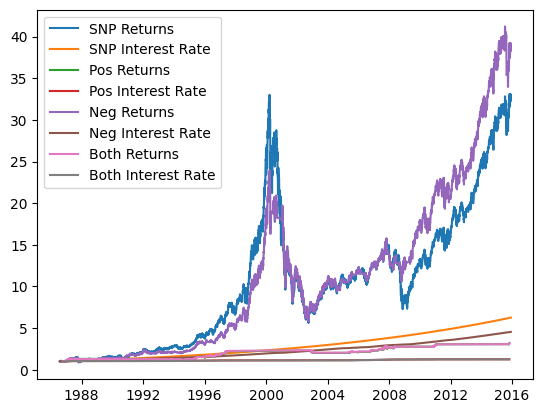

In [1117]:
snp_returns = (1+pct_returns_train).cumprod()
pos_model_returns = (1+pct_returns_train[train_dates.isin(dates_in_pos_mo)]).cumprod()
neg_model_returns = (1+pct_returns_train[~train_dates.isin(dates_in_neg_mo)]).cumprod()
neg_mo_train_dates = train_dates[~train_dates.isin(dates_in_neg_mo)]
both_model_returns = (1+pct_returns_train[~train_dates.isin(dates_in_neg_mo) & train_dates.isin(dates_in_pos_mo)]).cumprod()
both_mo_train_dates = train_dates[~train_dates.isin(dates_in_neg_mo) & train_dates.isin(dates_in_pos_mo)]
print(len(pos_model_returns))
print(len(neg_mo_train_dates))

#plot the strategy returns and pct_returns
plt.plot(train_dates, snp_returns, label='SNP Returns')
plt.plot(train_dates, np.array(([1.000248] * len(dates[:int(.8*len(dates))]))).cumprod(), label='SNP Interest Rate')
plt.plot(dates_in_pos_mo, pos_model_returns, label='Pos Returns')
plt.plot(dates_in_pos_mo, np.array(([1.000248] * len(pos_model_returns))).cumprod(), label='Pos Interest Rate')
plt.plot(neg_mo_train_dates, neg_model_returns, label='Neg Returns')
plt.plot(neg_mo_train_dates, np.array(([1.000248] * len(neg_model_returns))).cumprod(), label='Neg Interest Rate')
plt.plot(both_mo_train_dates, both_model_returns, label='Both Returns')
plt.plot(both_mo_train_dates, np.array(([1.000248] * len(both_model_returns))).cumprod(), label='Both Interest Rate')
plt.legend()

model_returns = (1+pct_returns_train[train_dates.isin(dates_in_pos_mo)]).cumprod()

model_returns[-1]/np.array(([1.000248] * len(model_returns))).cumprod()[-1]

In [1118]:
"""
Max drawdown is calculated by a saying that we borrow at 33% * stock value and have a minimum of 25% of the stock value in cash
This means that we can have a max loss of 91%. 

#cash value = .25 * stock value
(1-3x) = .25(3-x)
1=11x
"""
max_drawdown = .91

In [1119]:
def convt_pos_dates_to_streaks(dates_in_pos_mo, train_dates):
    """Given a set of train dates (train_dates), splits them into a list of lists. 
    Each list is a streak of consecutive dates when we hold.

    Args:
        dates_in_pos_mo (List): a list of dates when we hold
        train_dates (List): a list of all the dates in the training set
            These are consecutive, by which I mean that train_dates[i+1] - train_dates[i] = 1 day
    """
    in_streak = False
    streaks = []
    for i in range(len(train_dates)):
        if(not in_streak and train_dates[i] in dates_in_pos_mo):
            in_streak = True
            streaks.append([train_dates[i]])
        elif(in_streak and train_dates[i] in dates_in_pos_mo):
            streaks[-1].append(train_dates[i])
        elif(train_dates[i] not in dates_in_pos_mo):
            in_streak = False
        else:
            print('error')
    return streaks
        
streaks = convt_pos_dates_to_streaks(dates_in_pos_mo, train_dates)

In [1120]:
#import logger
import logging

#set up logger with info level
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a console handler and set its log level to INFO
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(formatter)

logger.handlers.clear()
logger.addHandler(console_handler)

2023-05-31 21:41:16,099 - __main__ - INFO - Returns wo floor: [1.0463590449975602, 1.7304951063911027, 0.9301087375838035, 1.0563968693800672, 0.94795632002132, 0.9602380485920141, 0.949480517159874, 0.8097503822049543, 0.9331182972794649, 1.2271257735422834, 1.1162697181471393, 1.185418704671456, 1.289342417417402, 0.8710908520932821, 1.2493796754809807, 0.9749668973252205, 1.2231125981567126, 1.2434572892545128, 1.2739285578679709, 1.1781620779794446, 0.8434712655542554, 0.8443683413911803, 1.073335073544448, 1.0475542373822255, 1.0330761520971399, 1.136101323863276, 0.994585472847925, 1.1317280313855715, 1.1354535769193888, 1.0742126600571424, 0.8945530385860764, 1.2255580900456189, 1.2529878663125373, 1.163650022783865]
2023-05-31 21:41:16,100 - __main__ - INFO - Num Streaks: 34


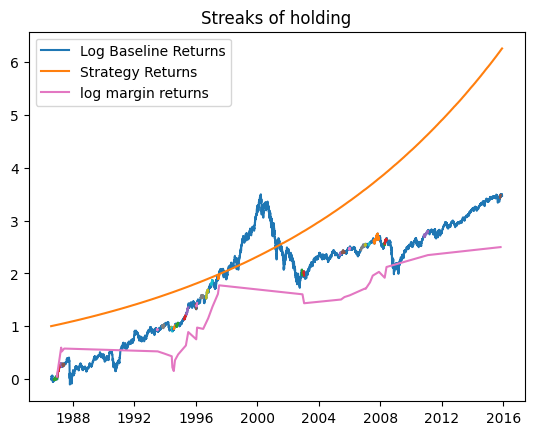

In [1121]:
def plot_streaks(dates_in_pos_mo, train_dates, pct_returns_train):
    """Plots the streaks of dates when we hold

    Args:
        streaks (List): a list of lists of dates when we hold
        train_dates (List): a list of all the dates in the training set
            These are consecutive, by which I mean that train_dates[i+1] - train_dates[i] = 1 day
        pct_returns_train (List): a list of the percent returns for each date in train_dates
    """
    margin_rate = 3
    interest_rate = .0002484
    max_drawdown = .91
    #calculate the returns for each streak
    streaks = convt_pos_dates_to_streaks(dates_in_pos_mo, train_dates)
    streak_rets = []
    min_rets = []
    for streak in streaks:
        ret = (1+pct_returns_train[train_dates.isin(streak)] - interest_rate).cumprod()[-1]
        min_ret = (1+pct_returns_train[train_dates.isin(streak)]).cumprod().min()
        min_rets.append(min_ret)
        margin_ret = 1 + margin_rate * (ret - 1)
        streak_rets.append(margin_ret)

    logger.info(msg = f"Returns wo floor: {streak_rets}")
    logger.info(f"Num Streaks: {len(streak_rets)}")
    streak_rets = [streak_rets[i] if min_rets[i] > max_drawdown else .70 for i in range(len(streak_rets))]
    snp_returns = (1+pct_returns_train).cumprod()


    plt.plot(train_dates, np.log(snp_returns), label='Log Baseline Returns')
    plt.plot(train_dates, np.array(([1.000248] * len(dates[:int(.8*len(dates))]))).cumprod(), label='Strategy Returns')

    #plot the dates in the streaks in a different collor
    for streak in streaks:
        plt.plot(streak, np.log(snp_returns)[train_dates.isin(streak)])


    #plot the streaks
    streak_ends = [streak[-1] for streak in streaks]
    plt.plot(streak_ends, np.log(np.cumprod(streak_rets)), label = 'log margin returns')
    plt.title('Streaks of holding')
    plt.legend()

plot_streaks(dates_in_pos_mo, train_dates, pct_returns_train)

Looking at the test data

In [1122]:
test_dates = dates[int(.8*len(dates)):]
test_pred = xgb_model.predict(X_test_scaled)

0.09445024375987864


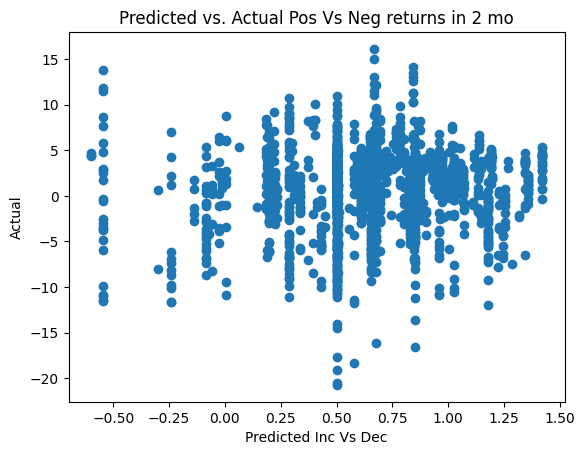

In [1123]:

gt = pct_change[:int(len(pct_change)*.8)]
gt_test = pct_change[int(len(pct_change)*.8):]
pct_returns_test = pct_returns[int(len(pct_change)*.8):]

plt.scatter(test_pred, gt_test)
plt.title('Predicted vs. Actual Pos Vs Neg returns in 2 mo')
plt.xlabel('Predicted Inc Vs Dec')
plt.ylabel('Actual')

#plot the correlation between predicted and actual
print(np.corrcoef(test_pred, gt_test)[0, 1])
#plot a histogram of the scores
# for i in zip(preds, gt):
#     # scatter plot
#     plt.scatter(i[0], i[1])


Text(0.5, -0.11, 'Predictions from basic xgboost regression. Y is increase in price in 2 months over current avg. \nFor training, it is filtered to remove avg points. The overall AUC score is .55. \n Please see the code in cache_notebooks/snp500_xgboost_classification.ipynb')

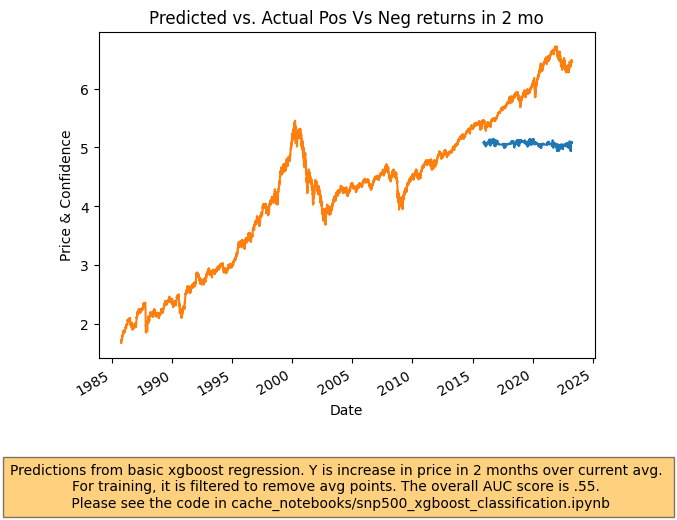

In [1124]:
#plot exp_preds as a function of time
plt.plot(test_dates,test_pred/10 + 5)
#plot dataset with adjusted close
#dataset['Adj Close'].plot()
#plot the log of the adjusted close
(np.log(dataset['Adj Close'])-3).plot()
plt.title('Predicted vs. Actual Pos Vs Neg returns in 2 mo')
plt.xlabel('Date')
plt.ylabel('Price & Confidence')
#add caption below plot
text = "Predictions from basic xgboost regression. Y is increase in price in 2 months over current avg. \n"+\
        "For training, it is filtered to remove avg points. The overall AUC score is .55. \n Please see the code in cache_notebooks/snp500_xgboost_classification.ipynb"
plt.figtext(0.5, -0.11, text, ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

#save plot to cache_notebooks/snp500_xgboost_classification.ipynb
#plt.savefig('../graph_results/snp500_xgboost_classification.png', bbox_inches='tight')

In [1125]:
(test_pred < lower_threshold).sum()

109

In [1126]:
dates_in_neg_mo = []
streaks = []

for i in dates[int(.8*len(dates)):][test_pred < lower_threshold]:
    for j in pd.date_range(i, periods = 14, freq='D'):
        if (j not in dates_in_neg_mo):
            dates_in_neg_mo.append(j)
dates_in_neg_mo = [i for i in dates_in_neg_mo if i in dates[int(.8*len(dates)):]]
#make dates_in_pos_mo unique
dates_in_neg_mo = sorted(list(set(dates_in_neg_mo)))

In [1127]:
dates_in_pos_mo = []
for i in test_dates[test_pred > threshold]:
    for j in pd.date_range(i, periods=14, freq='D'):
        if (j not in dates_in_pos_mo):
            dates_in_pos_mo.append(j)
dates_in_pos_mo = [i for i in dates_in_pos_mo if i in test_dates]

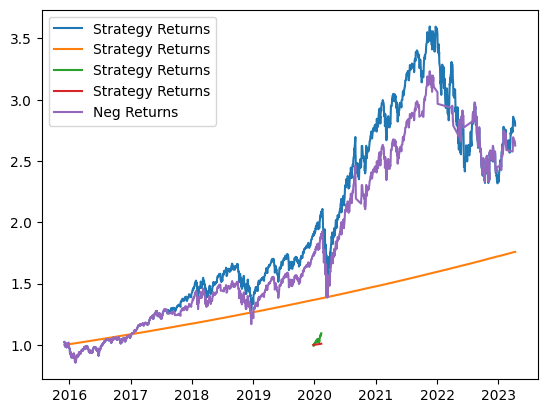

In [1128]:
neg_model_returns = (1+pct_returns_test[~test_dates.isin(dates_in_neg_mo)]).cumprod()
neg_mo_train_dates = test_dates[~test_dates.isin(dates_in_neg_mo)]

#plot the strategy returns and pct_returns
plt.plot(test_dates, (1+pct_returns_test).cumprod(), label='Strategy Returns')
plt.plot(test_dates, np.array(([1.0003054] * len(test_dates))).cumprod(), label='Strategy Returns')

plt.plot(dates_in_pos_mo, (1+pct_returns_test[test_dates.isin(dates_in_pos_mo)]).cumprod(), label='Strategy Returns')
plt.plot(dates_in_pos_mo, np.array(([1.0003054] * len(dates_in_pos_mo))).cumprod(), label='Strategy Returns')

plt.plot(neg_mo_train_dates, neg_model_returns, label='Neg Returns')


#plt.plot(dates[:int(.8*len(dates))], (1+np.array(pct_returns)).cumprod(), label='S&P500 Returns')
plt.legend()

2023-05-31 21:39:21,487 - __main__ - INFO - Returns wo floor: [1.2593833678645965]
2023-05-31 21:39:21,487 - __main__ - INFO - Num Streaks: 1


1850
1850


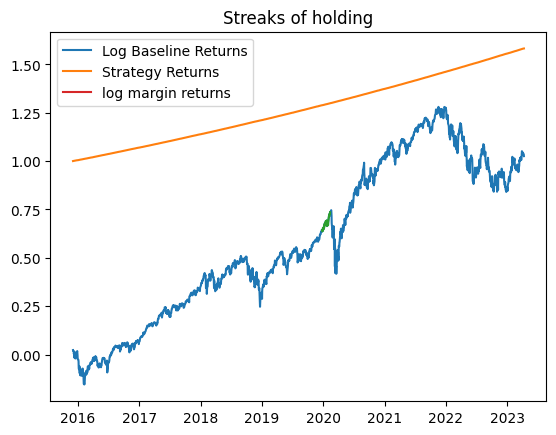

In [1044]:
def plot_streaks(dates_in_pos_mo, train_dates, pct_returns_train):
    """Plots the streaks of dates when we hold

    Args:
        streaks (List): a list of lists of dates when we hold
        train_dates (List): a list of all the dates in the training set
            These are consecutive, by which I mean that train_dates[i+1] - train_dates[i] = 1 day
        pct_returns_train (List): a list of the percent returns for each date in train_dates
    """
    margin_rate = 3
    interest_rate = .0002484
    max_drawdown = .91
    #calculate the returns for each streak
    streaks = convt_pos_dates_to_streaks(dates_in_pos_mo, train_dates)
    streak_rets = []
    min_rets = []
    for streak in streaks:
        ret = (1+pct_returns_train[train_dates.isin(streak)] - interest_rate).cumprod()[-1]
        min_ret = (1+pct_returns_train[train_dates.isin(streak)]).cumprod().min()
        min_rets.append(min_ret)
        margin_ret = 1 + margin_rate * (ret - 1)
        streak_rets.append(margin_ret)

    logger.info(msg = f"Returns wo floor: {streak_rets}")
    logger.info(f"Num Streaks: {len(streak_rets)}")
    streak_rets = [streak_rets[i] if min_rets[i] > max_drawdown else .70 for i in range(len(streak_rets))]
    snp_returns = (1+pct_returns_train).cumprod()

    print(len(train_dates))
    print(len(snp_returns))
    plt.plot(train_dates, np.log(snp_returns), label='Log Baseline Returns')
    plt.plot(train_dates, np.array(([1.000248] * len(train_dates))).cumprod(), label='Strategy Returns')

    #plot the dates in the streaks in a different collor
    for streak in streaks:
        plt.plot(streak, np.log(snp_returns)[train_dates.isin(streak)])


    #plot the streaks
    streak_ends = [streak[-1] for streak in streaks]
    plt.plot(streak_ends, np.log(np.cumprod(streak_rets)), label = 'log margin returns')
    plt.title('Streaks of holding')
    plt.legend()

plot_streaks(dates_in_pos_mo, test_dates, pct_returns_test)

In [1129]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **configs)
xgb_model.fit(X_scaled, y)

print('threshold is ', threshold)
xgb_model.predict(latest_values_scaled)

threshold is  1.3604110479354858


array([0.71495056], dtype=float32)

In [1161]:
#save the model and scaler
import pickle
pickle.dump(xgb_model, open('model_outputs/xgb_model_v0.pkl', 'wb'))
pickle.dump(scaler, open('model_outputs/scaler_v0.pkl', 'wb'))

scalar = pickle.load(open('model_outputs/scaler_v0.pkl', 'rb'))

In [1164]:
scaler = pickle.load(open('model_outputs/scaler_v0.pkl', 'rb'))
latest_values_scaled = scaler.transform(latest_values[cols_to_model].values.reshape(1, -1))

model = pickle.load(open('model_outputs/xgb_model_v0.pkl', 'rb'))
prediction = model.predict(latest_values_scaled)

/Users/andrew/opt/anaconda3/envs/trading_modeling/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1166]:
lower_threshold

0.06574995070695877

In [1193]:
#Download SNP500 data from 1973 to 2023
#use Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import yfinance as yf
import pandas_datareader.data as web
import boto3


pred_preiod = 10
dist = 0

# Download data for the S&P 500 index from 2020 to 2022
ticker = "NDX" #"SPY"
start_date = "1973-01-01"
end_date = "2023-05-25"
sp500_data = yf.download(ticker, start=start_date, end=end_date)

#get percent growth from start to end
start_price = sp500_data["Adj Close"][0]
end_price = sp500_data["Adj Close"][-1]
percent_growth = (end_price-start_price)/start_price

dataset = pd.DataFrame(sp500_data["Adj Close"])

#get the most important technical indicators
ma_50 = sp500_data["Adj Close"].rolling(window=50).mean()
ma_200 = sp500_data["Adj Close"].rolling(window=200).mean()
ema_5 = sp500_data["Adj Close"].ewm(span=5, adjust=False).mean()
ema_10 = sp500_data["Adj Close"].ewm(span=10, adjust=False).mean()
ema_25 = sp500_data["Adj Close"].ewm(span=25, adjust=False).mean()
ema_50 = sp500_data["Adj Close"].ewm(span=50, adjust=False).mean()
ema_200 = sp500_data["Adj Close"].ewm(span=200, adjust=False).mean()

#get the RSI (relative strength index)
#RSI = 100 - 100/(1 + RS)
rsi = ta.momentum.RSIIndicator(sp500_data["Adj Close"], window=14).rsi()

# Download VIX data from Yahoo Finance
vix = yf.download('^VIX', start=start_date, end=end_date)

dataset['ma_50'] = ma_50
dataset['ma_200'] = ma_200
dataset['ema_5'] = ema_5
dataset['ema_10'] = ema_10
dataset['ema_25'] = ema_25
dataset['ema_50'] = ema_50
dataset['ema_200'] = ema_200
dataset['rsi'] = rsi

gdp = web.DataReader('GDPC1', 'fred', start_date, end_date) #Lags behind 6 months
inflation = web.DataReader('CPIAUCSL', 'fred', start_date, end_date) #Lags behind 2 months
unemployment = web.DataReader('UNRATE', 'fred', start_date, end_date) #lags behind 3 months

#convert inflation to inflatin rate
inflation_rate = inflation.pct_change()
#add smoothed inflation rate
inflation_rate['inflation_rate_12m'] = inflation_rate['CPIAUCSL'].rolling(window=12).mean()

dataset['daily_returns'] = sp500_data["Adj Close"].pct_change().shift(-1)

#calculate moving average of GDP
gdp['gdp_1m'] = gdp['GDPC1'].rolling(window=1).mean()
gdp['gdp_4m'] = gdp['GDPC1'].rolling(window=4).mean()
gdp['gdp_12m'] = gdp['GDPC1'].rolling(window=12).mean()
gdp['gdp_ratio_1m'] = (gdp['gdp_1m']/gdp['gdp_12m'])
gdp['gdp_ratio_1m_short'] = (gdp['gdp_1m']/gdp['gdp_4m'])
gdp['gdp_ratio_4m'] = (gdp['gdp_4m']/gdp['gdp_12m'])
gdp['gdp_pct_change'] = gdp['GDPC1'].pct_change()
#plot gdp

unemployment['unemployment_1m'] = unemployment['UNRATE'].rolling(window=1).mean()
unemployment['unemployment_4m'] = unemployment['UNRATE'].rolling(window=4).mean()
unemployment['unemployment_12m'] = unemployment['UNRATE'].rolling(window=12).mean()
unemployment['unemployment_ratio_1m'] = (unemployment['unemployment_1m']/unemployment['unemployment_12m'])
unemployment['unemployment_ratio_1m_short'] = (unemployment['unemployment_1m']/unemployment['unemployment_4m'])
unemployment['unemployment_ratio_4m'] = (unemployment['unemployment_4m']/unemployment['unemployment_12m'])
unemployment['unemployment_pct_change'] = unemployment['UNRATE'].pct_change()

inflation_rate['inflation_rate_1m'] = inflation_rate['CPIAUCSL'].rolling(window=1).mean()
inflation_rate['inflation_rate_4m'] = inflation_rate['CPIAUCSL'].rolling(window=4).mean()
inflation_rate['inflation_rate_12m'] = inflation_rate['CPIAUCSL'].rolling(window=12).mean()
inflation_rate['inflation_rate_ratio_1m'] = (inflation_rate['inflation_rate_1m']/inflation_rate['inflation_rate_12m'])
inflation_rate['inflation_rate_ratio_1m_short'] = (inflation_rate['inflation_rate_1m']/inflation_rate['inflation_rate_4m'])
inflation_rate['inflation_rate_ratio_4m'] = (inflation_rate['inflation_rate_4m']/inflation_rate['inflation_rate_12m'])
inflation_rate['inflation_rate_pct_change'] = inflation_rate['CPIAUCSL'].pct_change()

dataset['gdp_ratio_1m'] = gdp['gdp_ratio_1m']
dataset['gdp_ratio_1m_short'] = gdp['gdp_ratio_1m_short']
dataset['gdp_ratio_4m'] = gdp['gdp_ratio_4m']
dataset['gdp_pct_change'] = gdp['gdp_pct_change']

dataset['unemployment'] = unemployment['UNRATE']
dataset['unemployment_ratio_1m'] = unemployment['unemployment_ratio_1m']
dataset['unemployment_ratio_1m_short'] = unemployment['unemployment_ratio_1m_short']
dataset['unemployment_ratio_4m'] = unemployment['unemployment_ratio_4m']
dataset['unemployment_pct_change'] = unemployment['unemployment_pct_change']

dataset['inflation_rate'] = inflation_rate['inflation_rate_12m']
dataset['inflation_rate_ratio_1m'] = inflation_rate['inflation_rate_ratio_1m']
dataset['inflation_rate_ratio_1m_short'] = inflation_rate['inflation_rate_ratio_1m_short']
dataset['inflation_rate_ratio_4m'] = inflation_rate['inflation_rate_ratio_4m']
dataset['inflation_rate_pct_change'] = inflation_rate['inflation_rate_pct_change']

#investor Intelligence Sentiment Index
consumer_sentimet = web.DataReader('UMCSENT', 'fred', start_date, end_date) # Lags behind 
equity_volatility = web.DataReader('EMVMACROBUS', 'fred', start_date, end_date)

consumer_sentimet['sent_1m'] = consumer_sentimet['UMCSENT'].rolling(window=1).mean()
consumer_sentimet['sent_4m'] = consumer_sentimet['UMCSENT'].rolling(window=4).mean()
consumer_sentimet['sent_12m'] = consumer_sentimet['UMCSENT'].rolling(window=12).mean()
consumer_sentimet['sent_ratio_1m'] = (consumer_sentimet['sent_1m']/consumer_sentimet['sent_12m'])
consumer_sentimet['sent_ratio_1m_short'] = (consumer_sentimet['sent_1m']/consumer_sentimet['sent_4m'])
consumer_sentimet['sent_ratio_4m'] = (consumer_sentimet['sent_4m']/consumer_sentimet['sent_12m'])
consumer_sentimet['sent_pct_change'] = consumer_sentimet['UMCSENT'].pct_change()

equity_volatility['vol_1m'] = equity_volatility['EMVMACROBUS'].rolling(window=1).mean()
equity_volatility['vol_4m'] = equity_volatility['EMVMACROBUS'].rolling(window=4).mean()
equity_volatility['vol_12m'] = equity_volatility['EMVMACROBUS'].rolling(window=12).mean()
equity_volatility['vol_ratio_1m'] = (equity_volatility['vol_1m']/equity_volatility['vol_12m'])
equity_volatility['vol_ratio_1m_short'] = (equity_volatility['vol_1m']/equity_volatility['vol_4m'])
equity_volatility['vol_ratio_4m'] = (equity_volatility['vol_4m']/equity_volatility['vol_12m'])
equity_volatility['vol_pct_change'] = (equity_volatility['EMVMACROBUS']+1).pct_change()

dataset['consumer_sentimet'] = consumer_sentimet['UMCSENT'] #lags behind 3 mo
dataset['sent_ratio_1m'] = consumer_sentimet['sent_ratio_1m']
dataset['sent_ratio_1m_short'] = consumer_sentimet['sent_ratio_1m_short']
dataset['sent_ratio_4m'] = consumer_sentimet['sent_ratio_4m']
dataset['sent_pct_change'] = consumer_sentimet['sent_pct_change']

dataset['equity_volatility'] = equity_volatility['EMVMACROBUS'] #lags behind 2 mo
dataset['vol_ratio_1m'] = equity_volatility['vol_ratio_1m']
dataset['vol_ratio_1m_short'] = equity_volatility['vol_ratio_1m_short']
dataset['vol_ratio_4m'] = equity_volatility['vol_ratio_4m']
dataset['vol_pct_change'] = equity_volatility['vol_pct_change']

dataset['norm_ema_ratio_50'] = (dataset['ema_50'] - dataset['ema_200'])/dataset['ema_200']
dataset['norm_ema_ratio_25'] = (dataset['ema_25'] - dataset['ema_200'])/dataset['ema_200']
dataset['norm_ema_ratio_10'] = (dataset['ema_10'] - dataset['ema_50'])/dataset['ema_50']
dataset['norm_ema_ratio_5'] = (dataset['ema_5'] - dataset['ema_50'])/dataset['ema_50']

dataset["EMA_crossover"] = ((dataset['norm_ema_ratio_50'].shift(1) < 0) & (dataset['norm_ema_ratio_50'] > 0)).astype(int)

#rsa moving average
dataset['rsi_ma_50'] = dataset['rsi'].rolling(window=50).mean()
dataset['rsi_ma_25'] = dataset['rsi'].rolling(window=25).mean()
dataset['rsi_ma_100'] = dataset['rsi'].rolling(window=100).mean()
dataset['rsi_ma_200'] = dataset['rsi'].rolling(window=200).mean()

latest_values = dataset.fillna(method='ffill').iloc[-1]

cols_to_model = ['norm_ema_ratio_50', 'norm_ema_ratio_25', 'norm_ema_ratio_10', 'norm_ema_ratio_5', 
        'EMA_crossover', 'rsi', 'rsi_ma_25','rsi_ma_50','rsi_ma_100', 'rsi_ma_200',
        'gdp_ratio_1m', 'gdp_ratio_1m_short', 'gdp_ratio_4m', 'gdp_pct_change',
       'unemployment', 'unemployment_ratio_1m', 'unemployment_ratio_1m_short', 'unemployment_ratio_4m', 'unemployment_pct_change',
       'consumer_sentimet', 'sent_ratio_1m', 'sent_ratio_1m_short', 'sent_ratio_4m', 'sent_pct_change',
       'inflation_rate', 'inflation_rate_ratio_1m', 'inflation_rate_ratio_1m_short', 'inflation_rate_ratio_4m', #'inflation_rate_pct_change',
       'equity_volatility', 'vol_ratio_1m', 'vol_ratio_1m_short', 'vol_ratio_4m', 'vol_pct_change']

scaler = pickle.load(open('model_outputs/scaler_v0.pkl', 'rb'))
latest_values_scaled = scaler.transform(latest_values[cols_to_model].values.reshape(1, -1))

model = pickle.load(open('model_outputs/xgb_model_v0.pkl', 'rb'))
prediction = model.predict(latest_values_scaled)


print("The predicted return for the next 10 days is: ", prediction[0])
print("this model was trained to predict stock price in 2 weeks")
print('The 90 "%" confidence interval is: ', 1.360411)
print("the 10% confidence threshold is ", 0.065)

if(prediction[0] < 0.065):
    print("Please stop your buying. This actually won't change anything, but is a good way to make you feel like you have control over your life.")
if(prediction[0] > 1.360411):
    print("Please buy on margin. Hold this position for 2 weeks unless this is triggered again. \n",
          "If it is triggered again, please buy again and continue holding \n",
          "If this position goes down 90%, exit the buy and dont buy while this high streak of predictions continues. \n",
          "Good luck!")
    
text = "The predicted return for the next 10 days is: " + str(prediction[0]) + "\n" +\
        "this model was trained to predict stock price in 2 weeks" + "\n" +\
        'The 90 "%" confidence interval is: ' + str(1.360411) + "\n" +\
        "the 10% confidence threshold is " + str(0.065) + "\n"

if(prediction[0] < 0.065):
    text = text + "Please stop your buying. This actually won't change anything, but is a good way to make you feel like you have control over your life."
if(prediction[0] > 1.360411):
    text = text + "Please buy on margin. Hold this position for 2 weeks unless this is triggered again. \n" +\
          "If it is triggered again, please buy again and continue holding \n" +\
          "If this position goes down 90%, exit the buy and dont buy while this high streak of predictions continues. \n" +\
          "Good luck!"
  
# Create an AWS SES client
ses_client = boto3.client('ses', region_name='us-west-1')

# Send an email
response = ses_client.send_email(
    Source='a.l.andlyu@gmail.com',
    Destination={'ToAddresses': ['a.l.andlyu@gmail.com']},
    Message={
        'Subject': {'Data': 'Daily NASDAQ Alert'},
        'Body': {'Text': {'Data': text}}
    }
)

print('Email sent successfully.')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/Users/andrew/opt/anaconda3/envs/trading_modeling/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The predicted return for the next 10 days is:  0.71495056
this model was trained to predict stock price in 2 weeks
The 90 "%" confidence interval is:  1.360411
the 10% confidence threshold is  0.065
Email sent successfully.


In [1191]:
import boto3

# Create an AWS SES client
ses_client = boto3.client('ses', region_name='us-west-1')

# Send an email
response = ses_client.send_email(
    Source='a.l.andlyu@gmail.com',
    Destination={'ToAddresses': ['a.l.andlyu@gmail.com']},
    Message={
        'Subject': {'Data': 'Daily NASDAQ Alert'},
        'Body': {'Text': {'Data': 'This is a test email.'}}
    }
)

print('Email sent successfully.')

Email sent successfully.


In [1194]:
#save the model and scaler to s3
import pickle

pickle.dump(xgb_model, open('model_outputs/xgb_model_v0.pkl', 'wb'))
pickle.dump(scaler, open('model_outputs/scaler_v0.pkl', 'wb'))

s3 = boto3.resource('s3')
s3.meta.client.upload_file('model_outputs/xgb_model_v0.pkl', 'bitproj', 'xgb_v0/xgb_model_v0.pkl')
s3.meta.client.upload_file('model_outputs/scaler_v0.pkl', 'bitproj', 'xgb_v0/scaler_v0.pkl')